In [2]:
#install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library("factoextra")
library(readxl)
library(dplyr)
library(psych)
#install.packages("GPArotation")
library(GPArotation)
#install.packages("psy")
library(psy)
#install.packages("nFactors")
library(nFactors)
library(mvtnorm) # col.norm
library(tilting) # col.norm
library(corrplot)
library(writexl)
#install.packages("scales")
library(scales)
#install.packages("Rcsdp")
library(Rcsdp)

Warning message:
"package 'FactoMineR' was built under R version 4.0.3"
Warning message:
"package 'factoextra' was built under R version 4.0.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
"package 'dplyr' was built under R version 4.0.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'psych' was built under R version 4.0.3"

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


Warning message:
"package 'GPArotation' was built under R version 4.0.3"
Warning message:
"package 'psy' was built under R version 4.0.3"

Attaching package: 'psy'


The following object is masked from 'package:psych':

    

In [3]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
summary(df.wa)
colnames(df.wa)
str(df.wa)
head(df.wa, 7)

   Country               phom            pipy            ptap      
 Length:73          Min.   : 0.00   Min.   : 0.00   Min.   : 0.00  
 Class :character   1st Qu.: 2.70   1st Qu.: 3.30   1st Qu.: 3.00  
 Mode  :character   Median : 8.30   Median : 6.60   Median :10.30  
                    Mean   :18.31   Mean   :11.59   Mean   :12.01  
                    3rd Qu.:25.40   3rd Qu.:19.70   3rd Qu.:17.70  
                    Max.   :90.60   Max.   :54.10   Max.   :57.70  
      bore            pwel             pspr             rain       
 Min.   : 0.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 0.60   1st Qu.: 1.500   1st Qu.: 0.100   1st Qu.: 0.000  
 Median : 5.70   Median : 4.100   Median : 0.800   Median : 0.300  
 Mean   :13.43   Mean   : 6.747   Mean   : 3.342   Mean   : 2.742  
 3rd Qu.:22.90   3rd Qu.: 9.000   3rd Qu.: 4.200   3rd Qu.: 1.700  
 Max.   :86.40   Max.   :48.100   Max.   :47.900   Max.   :46.700  
      uwel             uspr             truc    

[1] "Country" "phom"    "pipy"    "ptap"    "bore"    "pwel"    "pspr"   
 [8] "rain"    "uwel"    "uspr"    "truc"    "ctan"    "bott"    "othw"   
[15] "surw"    "tles"    "tmor"    "watp"

tibble [73 x 18] (S3: tbl_df/tbl/data.frame)
 $ Country: chr [1:73] "Afghanistan" "Albania" "Angola" "Armenia" ...
 $ phom   : num [1:73] 2.3 48.8 4.3 88.3 34 4.3 5.1 24.6 2.6 1.1 ...
 $ pipy   : num [1:73] 4.8 5.2 9.7 8 19.7 3.3 4.2 54.1 9.6 5 ...
 $ ptap   : num [1:73] 14.2 2.4 10.3 0.5 3.5 2.7 13 5.3 18.4 24 ...
 $ bore   : num [1:73] 20.1 1.4 1.9 0.2 9.3 86.4 28.9 0 40.6 0.6 ...
 $ pwel   : num [1:73] 18.5 4.1 9.1 0.2 6.2 0.2 4.4 1.7 9 1.8 ...
 $ pspr   : num [1:73] 4.7 2.5 3.3 1 7.5 0 0.3 0 0.2 47.9 ...
 $ rain   : num [1:73] 0.4 0 1.7 0 0 0.4 0.4 0 0 0 ...
 $ uwel   : num [1:73] 11.1 0.8 8.3 0 0.2 0.6 20.8 6.2 16.3 1.7 ...
 $ uspr   : num [1:73] 8.6 0.8 4.8 0.1 1.1 0.3 1.2 0 1.5 10.9 ...
 $ truc   : num [1:73] 1.5 14.1 9.7 1.5 9.5 0 0.2 1.7 0 0 ...
 $ ctan   : num [1:73] 4.4 0.2 4.3 0 0.7 0.1 0.3 0 0.2 0 ...
 $ bott   : num [1:73] 0.2 19.6 1.2 0 0.1 0.3 0 0 0.2 0.1 ...
 $ othw   : num [1:73] 1.7 0.1 1.8 0 1.1 0.1 0.4 0.9 0.5 0.1 ...
 $ surw   : num [1:73] 7.3 0 18 0 7 1.2 5.8 5.2

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5
Benin,5.1,4.2,13.0,28.9,4.4,0.3,0.4,20.8,1.2,0.2,0.3,0.0,0.4,5.8,49.8,12.1,37.4


The goal of this study is to analyze the characteristics of the water accessibility variables.

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.1306056 1.3634837 1.29778602 1.19416869 1.09637759
Proportion of Variance 0.2670282 0.1093581 0.09907344 0.08388464 0.07070846
Cumulative Proportion  0.2670282 0.3763863 0.47545978 0.55934442 0.63005288
                           Comp.6     Comp.7     Comp.8    Comp.9    Comp.10
Standard deviation     0.99851459 0.99230650 0.95128241 0.9075667 0.80357634
Proportion of Variance 0.05864891 0.05792189 0.05323166 0.0484516 0.03798441
Cumulative Proportion  0.68870179 0.74662368 0.79985534 0.8483069 0.88629135
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.68852496 0.64449468 0.59008870 0.52902160 0.47384234
Proportion of Variance 0.02788627 0.02443373 0.02048263 0.01646258 0.01320745
Cumulative Proportion  0.91417762 0.93861135 0.95909398 0.97555656 0.98876400
                           Comp.16     Comp.17
Sta


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
phom  0.321  0.105  0.150  0.112  0.414                0.287  0.259  0.217 
pipy         0.425  0.299        -0.441 -0.129  0.142  0.177 -0.302        
ptap -0.265  0.382  0.234        -0.138         0.226 -0.238               
bore -0.136 -0.418  0.155 -0.367        -0.299 -0.333 -0.208  0.164 -0.317 
pwel -0.178 -0.337  0.118  0.324  0.107  0.148  0.397  0.296        -0.357 
pspr -0.166  0.326 -0.425         0.271 -0.116  0.200 -0.107        -0.317 
rain  0.120        -0.320        -0.364  0.676 -0.162 -0.151 -0.138 -0.161 
uwel -0.279 -0.277  0.247  0.169         0.193  0.115 -0.131         0.508 
uspr -0.255  0.198 -0.446                              0.229  0.141  0.134 
truc                       0.531  0.249 -0.104 -0.369 -0.312 -0.496 -0.152 
ctan        -0.191 -0.235  0.431 -0.400 -0.434  0.244                      
bott  0.271 -0.176 -0.381        -0.114 -0.113  0.274 -0.278         0.301 
o

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17
-1.2868468,-1.03663795,-0.61217110,2.50312436,-1.525216944,-1.27347180,0.66498052,0.146846337,1.47293884,-1.04253138,0.49504676,0.33759151,0.44482319,-0.59870956,0.58014984,-0.262345270,-0.15091285
2.8131857,0.12703295,-0.02071369,1.95600884,2.305370286,-0.66207155,-1.04070025,-1.145620599,-1.90001273,-0.14501096,-0.41849538,-0.03512015,0.63979743,-1.04387094,-0.79651029,0.598389482,0.73198933
-1.1537387,0.06555506,-0.89534684,4.41433483,-1.559080347,-1.35878272,-1.60021422,0.006613721,-0.38691754,-0.48998619,-0.02418597,0.98353323,0.01785605,0.33379182,-0.13112933,0.208028719,0.04723000
3.5437710,0.48733676,0.62306608,-0.28836146,2.091789959,0.05980695,-0.08918265,1.076487644,0.39074057,0.72996122,0.82043497,0.75974773,0.11451862,-0.31692970,0.76930121,0.319017780,-0.07250600
1.6112298,1.00924477,0.29320267,1.81872723,0.750967250,-0.78970444,-1.37677890,-0.051325217,-0.87624596,-1.07760362,0.01662261,-0.08943832,-0.62401715,-0.45542916,-0.08189944,0.085934413,0.38446336
0.7290469,-2.21050962,0.71995716,-2.68514757,0.316571798,-1.62213503,-1.76561108,-0.962100931,0.75259235,-1.51237270,0.69027153,-0.26117054,0.14662011,-0.04485031,0.51531961,-0.879776389,0.17860092
-1.4374051,-1.15564499,0.91096104,-0.42495019,-0.193147651,0.05235868,-0.38070925,-0.568790345,0.44411879,0.76603455,0.14484430,0.38001290,-0.39405390,-0.39639380,-0.35170256,-0.196103958,-0.20979303
2.0887771,2.00384250,1.75097862,-0.17378531,-1.522959344,-0.41381765,-0.06285404,1.033149312,-0.91012788,0.03405558,0.91926483,-1.09455482,-1.37709107,-0.17995280,-0.26057189,0.002125967,0.28999403
-2.3199042,-0.94211286,1.29461476,-0.58700390,0.241219352,0.21746489,0.36001891,-1.641803548,0.37252804,0.04645614,0.88580091,-0.33407803,-0.02158828,0.90998036,0.21366177,0.238691679,0.15020369
-3.3616414,3.19378576,-3.20042982,-1.03851878,2.170211230,-0.47424729,1.49086722,-1.131872376,0.37255344,-1.59230742,-0.37322626,1.53911585,-2.15377571,-0.56336844,-0.15216301,0.146263367,-0.04057106


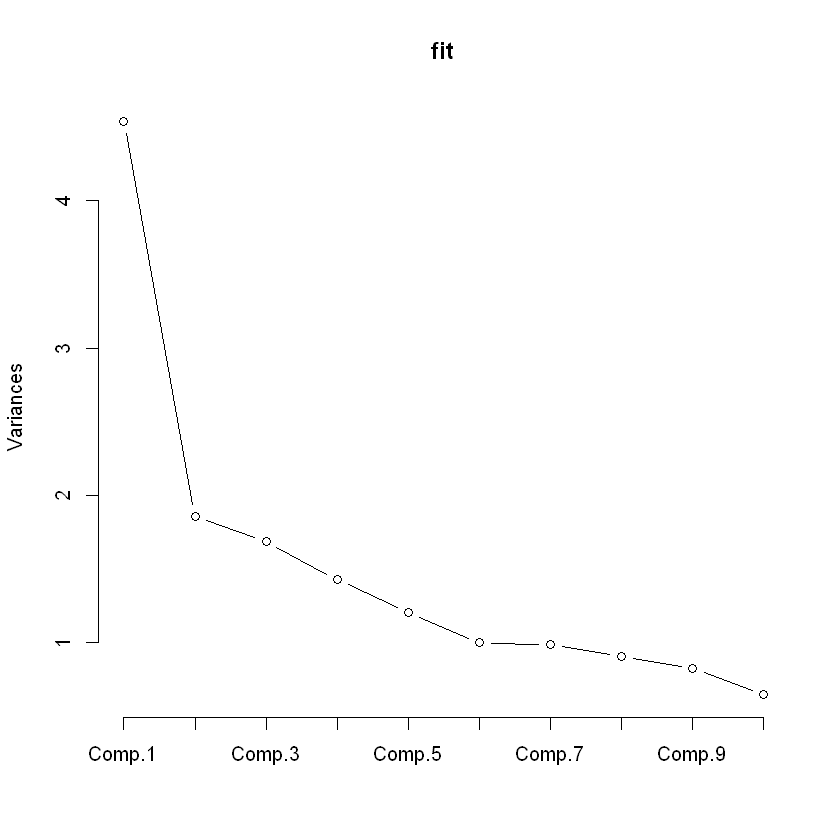

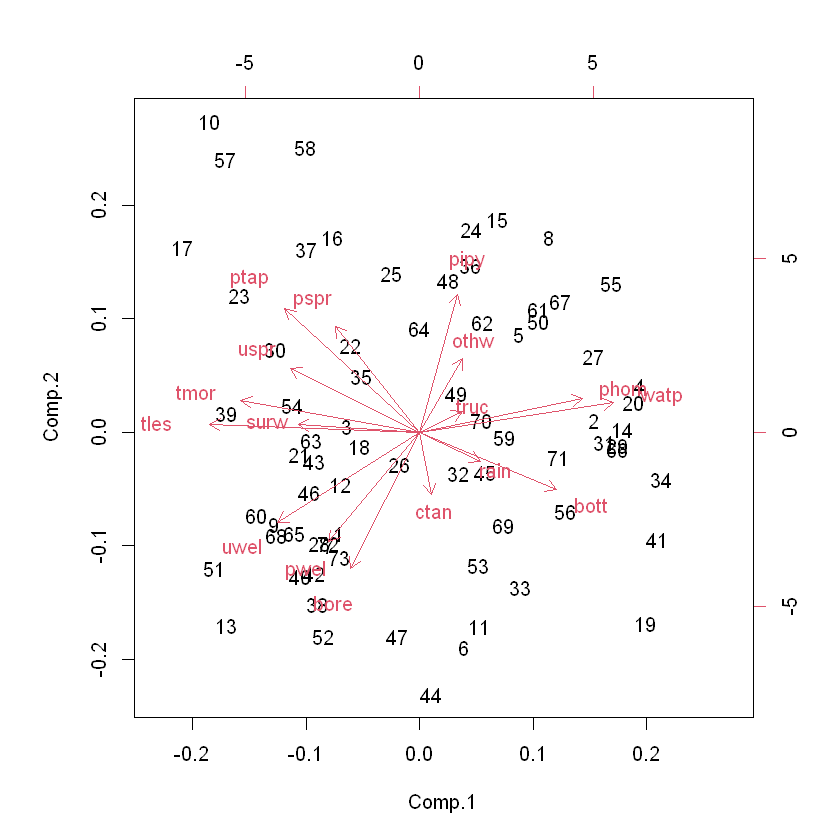

In [4]:
fit <- princomp(df.wa[,c(2:18)], cor=TRUE)
summary(fit) # print variance accounted for
loadings(fit) # pc loadings
plot(fit,type="lines") # scree plot
fit$scores # the principal components
biplot(fit )

In [5]:
# Varimax Rotated Principal Components
# retaining 7 components
fit <- principal(df.wa[,c(2:18)], nfactors=5, rotate="oblimin")
fit # print results

Principal Components Analysis
Call: principal(r = df.wa[, c(2:18)], nfactors = 5, rotate = "oblimin")
Standardized loadings (pattern matrix) based upon correlation matrix
       TC1   TC3   TC4   TC2   TC5   h2   u2 com
phom -0.24 -0.18  0.52 -0.13 -0.46 0.75 0.25 2.8
pipy -0.04 -0.19  0.02  0.86  0.00 0.76 0.24 1.1
ptap  0.53  0.19 -0.04  0.56 -0.08 0.71 0.29 2.3
bore  0.20 -0.33 -0.65 -0.27 -0.13 0.64 0.36 2.2
pwel  0.55 -0.20  0.12 -0.40  0.22 0.54 0.46 2.7
pspr -0.06  0.87  0.06 -0.06 -0.13 0.72 0.28 1.1
rain -0.57  0.05 -0.25  0.05  0.38 0.43 0.57 2.2
uwel  0.69 -0.27 -0.13 -0.13  0.24 0.65 0.35 1.7
uspr  0.06  0.80 -0.04 -0.08  0.15 0.71 0.29 1.1
truc  0.19 -0.02  0.73 -0.17  0.06 0.52 0.48 1.3
ctan -0.14 -0.07  0.19 -0.08  0.76 0.62 0.38 1.2
bott -0.76  0.02 -0.03 -0.24  0.24 0.65 0.35 1.4
othw  0.08 -0.13  0.51  0.37  0.27 0.45 0.55 2.7
surw  0.26  0.27 -0.03  0.07  0.44 0.42 0.58 2.5
tles  0.60  0.28 -0.34  0.09  0.12 0.80 0.20 2.2
tmor  0.61  0.43  0.06 -0.09  0.03 0.65 0.35 

sources: https://www.statmethods.net/advstats/factor.html

# Factor Analysis

sources: http://www.di.fc.ul.pt/~jpn/r/factoranalysis/factoranalysis.html

Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. […] Factor analysis searches for such joint variations in response to unobserved latent(*) variables.

# 5 Factors from Scree

In [6]:
df.wa.nocountry <- df.wa[,c(2:18)]

In [7]:
n.factors <- 5

fit <- factanal(df.wa.nocountry, 
                n.factors,                # number of factors to extract
                scores=c("regression"),
                rotation="oblimin")

print(fit, digits=2, cutoff=.2, sort=TRUE)


Call:
factanal(x = df.wa.nocountry, factors = n.factors, scores = c("regression"),     rotation = "oblimin")

Uniquenesses:
phom pipy ptap bore pwel pspr rain uwel uspr truc ctan bott othw surw tles tmor 
0.00 0.00 0.49 0.00 0.68 0.45 0.73 0.35 0.46 0.93 0.87 0.35 0.92 0.76 0.24 0.46 
watp 
0.38 

Loadings:
     Factor1 Factor2 Factor3 Factor4 Factor5
ptap  0.56    0.21   -0.26                  
rain -0.52    0.33                          
bott -0.83    0.20                          
tles  0.60    0.36                          
tmor  0.53    0.25                          
watp -0.57   -0.29   -0.23                  
phom         -0.99                          
pipy                 -1.00                  
bore                         -0.94          
pspr                                  0.64  
uwel  0.48    0.23    0.20           -0.52  
pwel  0.24            0.26           -0.38  
uspr  0.27    0.21    0.21            0.48  
truc                          0.21          
ctan -0.28    0

Test 5 Factors

In [8]:
head(fit$scores , 7)

Factor1,Factor2,Factor3,Factor4,Factor5
-0.01096520,0.7248597,0.5456368,0.0005476362,-0.34341524
-0.47270453,-1.1999688,0.7014624,0.4475109401,0.08071797
0.03217286,0.8868515,0.3068132,1.0748696138,-0.42095025
0.73125417,-3.5752224,0.5412338,0.0030331415,0.30816749
-0.03673702,-0.7204640,-0.6937512,-0.1838664329,0.34077370
-0.87357225,-0.1139800,-0.1298258,-4.6090541031,0.67317232
0.44495542,0.3605207,0.5341898,-0.4627451301,-0.81318990


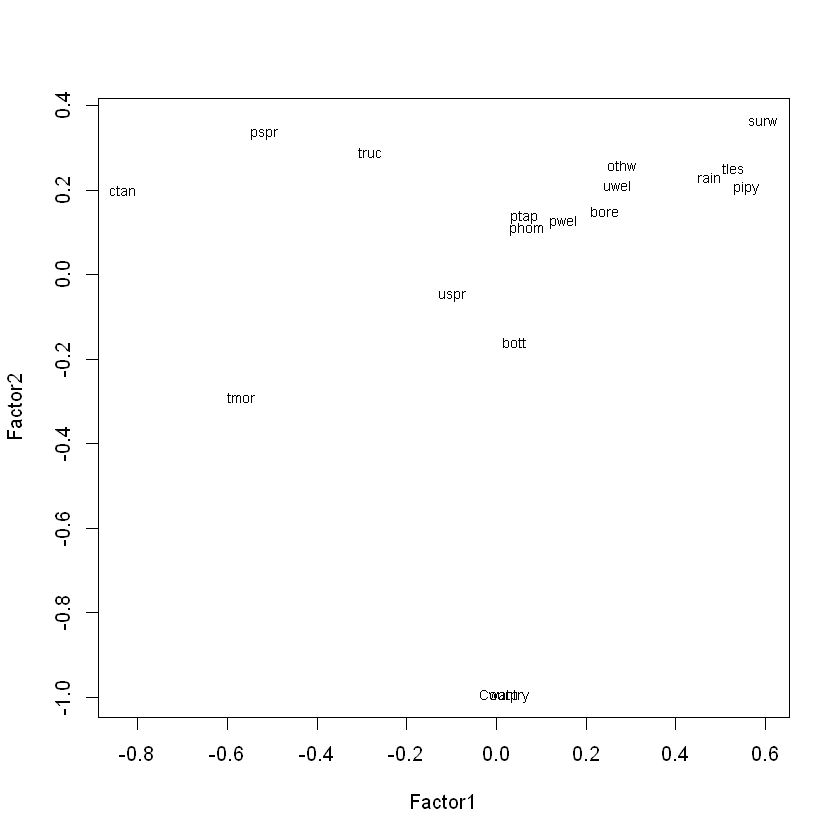

In [9]:
# plot factor 1 by factor 2 
load <- fit$loadings[,1:4] 
plot(load,type="n") # set up plot 
text(load,labels=names(df.wa),cex=.7) # add variable names

The output maximizes variance for the 1st and subsequent factors, while all are orthogonal to each other.

Rotation serves to make the output more understandable, by seeking so-called “Simple Structure”: A pattern of loadings where items load most strongly on one factor, and much more weakly on the other factors. Eg, varimax rotation is an orthogonal rotation of the factor axes to maximize the variance of the squared loadings of a factor (column) on all the variables (rows) in a factor matrix, which has the effect of differentiating the original variables by extracted factor. 

In [10]:
n.factors <- 5
fit <- factanal(df.wa.nocountry, # only use ml
                n.factors,              # number of factors to extract
                scores="regression",
                rotation="oblimin")     # 'varimax' is an ortho rotation

load <- fit$loadings[,1:4] 
head(load , 7)

,Factor1,Factor2,Factor3,Factor4
phom,0.01787082,-0.9933041,0.10194980,0.14198289
pipy,0.06949165,0.1081544,-0.99891925,0.09562695
ptap,0.55641574,0.2051772,-0.25701183,0.18148579
bore,0.06237526,0.1383786,0.10712179,-0.93978072
pwel,0.24294844,0.1514984,0.26015014,0.13841132
pspr,0.15004833,0.1264033,0.14209172,0.15822766
rain,-0.51631266,0.3341887,0.08102792,0.16244691


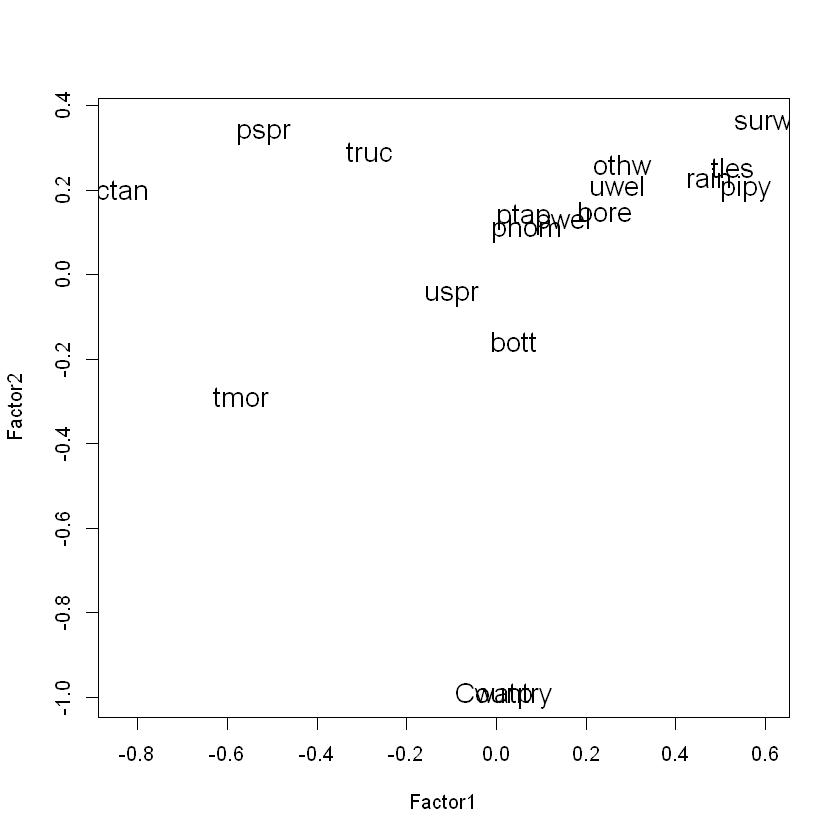

In [11]:
plot(load,type="n") # set up plot 
text(load,labels=names(df.wa),cex=1.4) # add variable names

In [12]:
cor <- cor(df.wa.nocountry)
which(cor > .6 & cor < 1)
 cor[cor > .6 & cor < 1]


integer(0)

numeric(0)

In [13]:
eigen <- eigen(cor)
eigen$values


[1] 4.53948006 1.85908768 1.68424854 1.42603886 1.20204382 0.99703140
 [7] 0.98467219 0.90493823 0.82367722 0.64573493 0.47406662 0.41537339
[13] 0.34820468 0.27986386 0.22452657 0.12470352 0.06630842

values <- eigen$values
which(values < 0)
vectors[values < 0]

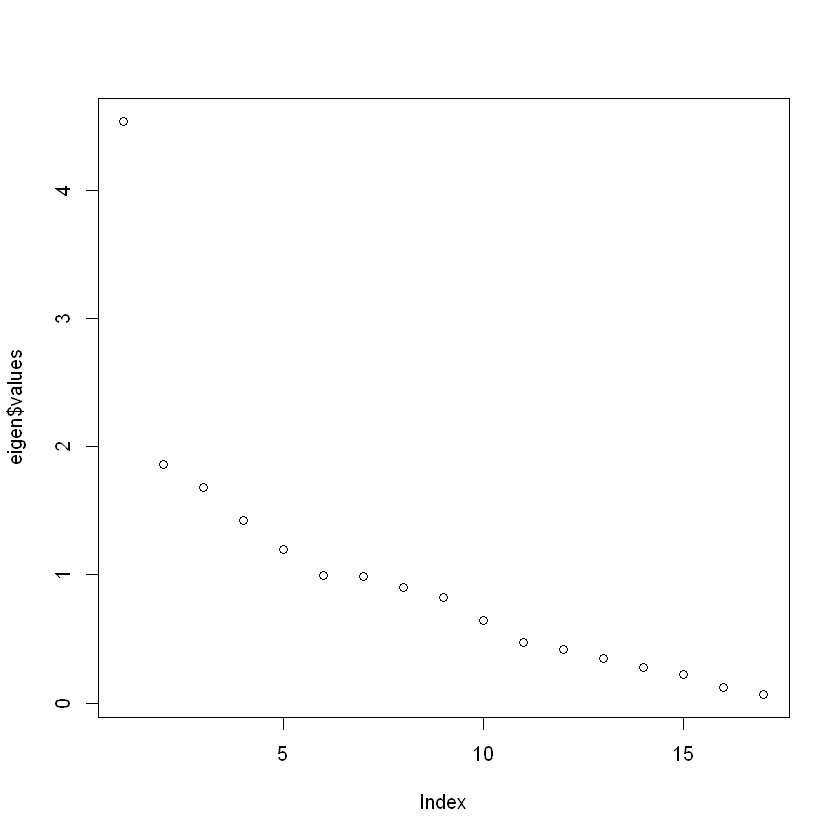

In [16]:
plot(eigen$values)

Looking at both plots we see that iwsp, watp all have high factor loadings around 0.9 on the first factor (PA1) while tles, tmor, uiws load highly on the second factor (PA2). We could rename PA1 as prem, and PA2 as dist.

In [17]:
solution <- fa(df.wa.nocountry, nfactors = 5, rotate = "oblimin", fm = "ml", scores="tenBerge", impute ="mean", max.iter = 1000 )

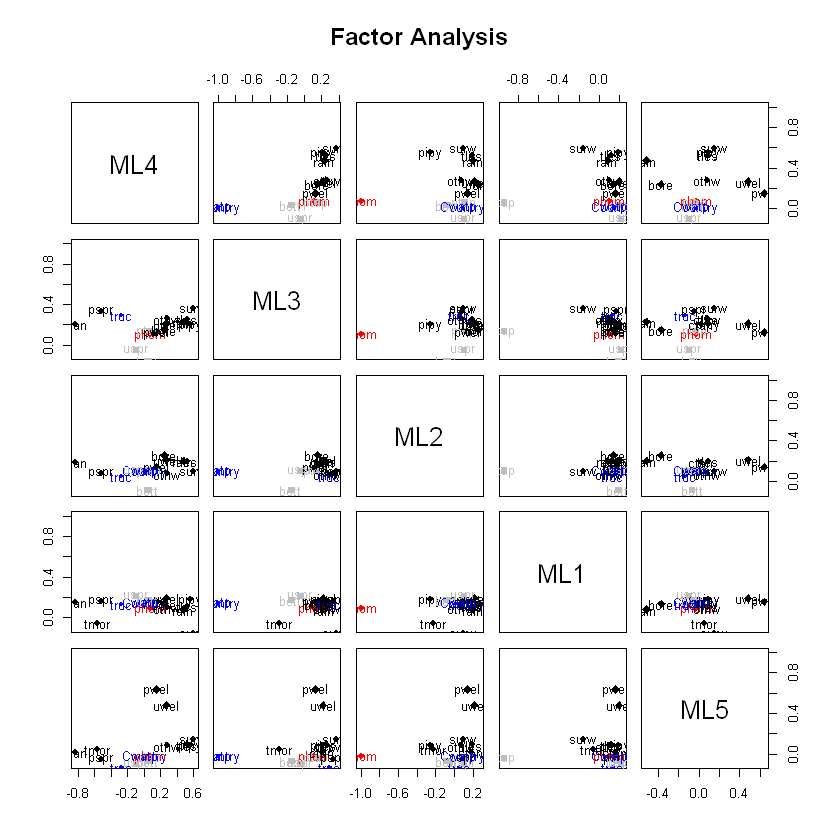

In [18]:
plot(solution,labels=names(df.wa),cex=1, ylim=c(-.1,1)) 

In [19]:
str(solution)

List of 51
 $ residual     : num [1:17, 1:17] 4.99e-03 -7.13e-06 -7.37e-04 -1.13e-05 -6.66e-04 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:17] "phom" "pipy" "ptap" "bore" ...
  .. ..$ : chr [1:17] "phom" "pipy" "ptap" "bore" ...
 $ dof          : num 61
 $ chi          : num 73
 $ nh           : num 73
 $ rms          : num 0.0606
 $ EPVAL        : num 0.14
 $ crms         : num 0.0905
 $ EBIC         : num -189
 $ ESABIC       : num 3.46
 $ fit          : num 0.818
 $ fit.off      : num 0.944
 $ sd           : num 0.0587
 $ factors      : num 5
 $ complexity   : Named num [1:17] 1.06 1.05 2.04 1.08 3.32 ...
  ..- attr(*, "names")= chr [1:17] "phom" "pipy" "ptap" "bore" ...
 $ n.obs        : int 73
 $ objective    : num 1.93
 $ criteria     : Named num [1:3] 1.93 NA NA
  ..- attr(*, "names")= chr [1:3] "objective" "" ""
 $ STATISTIC    : num 120
 $ PVAL         : num 9.71e-06
 $ Call         : language fa(r = df.wa.nocountry, nfactors = 5, rotate = "oblimin", scores = "te

In [20]:
scores.five.factors = solution$scores
scores.five.factors = as.data.frame.matrix(scores.five.factors) #df.wa multiply by scores matrix
head(scores.five.factors,7)

,ML4,ML3,ML2,ML1,ML5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3075335,0.794268779,0.68486771,-0.173149516,-0.35953953
2,-0.9333586,-1.298243838,0.39745496,0.525727621,0.03177309
3,0.3394386,0.822506840,0.36877193,0.901592913,-0.27799101
4,-0.5647926,-3.177221091,-0.04707368,0.293168197,0.09631073
5,-0.3604598,-0.818210842,-0.81779586,0.006031301,0.33196385
6,-0.7310032,0.009552377,0.23584056,-4.463167763,0.09682795
7,0.6556804,0.612359830,0.70509171,-0.692618753,-0.99153255


In [21]:
write_xlsx(scores.five.factors, '../../results/scores-5-factors.xlsx')

In [22]:
print(solution$loadings, digits=2, cutoff=.2, sort=TRUE) #sort out by the low numbers


Loadings:
     ML4   ML3   ML2   ML1   ML5  
ptap  0.56  0.21 -0.26            
rain -0.52  0.33                  
bott -0.83  0.20                  
tles  0.60  0.36                  
tmor  0.53  0.25                  
watp -0.57 -0.29 -0.23            
phom       -0.99                  
pipy             -1.00            
bore                   -0.94      
pspr                          0.64
uwel  0.48  0.23  0.20       -0.52
pwel  0.24        0.26       -0.38
uspr  0.27  0.21  0.21        0.48
truc                    0.21      
ctan -0.28  0.29                  
othw                              
surw  0.28  0.26                  

                ML4  ML3  ML2  ML1  ML5
SS loadings    2.78 1.81 1.43 1.23 1.13
Proportion Var 0.16 0.11 0.08 0.07 0.07
Cumulative Var 0.16 0.27 0.35 0.43 0.49


# For Loop for FA

In [23]:
#For loop for factors of 3-5 fm = "minchi"
for (i in 2:6) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "oblimin", fm = "minchi" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    #print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)
    print(iteration$BIC)
    print(iteration$TLI)
    print(iteration$rms)
    print(iteration$STATISTIC)
    print(iteration$PVAL)
    print(iteration$RMSEA)
} 


[1] -182.8098
[1] 0.434399
[1] 0.1172336
[1] 259.1076
[1] 1.948092e-15
     RMSEA      lower      upper confidence 
 0.1434276  0.1231682  0.1672327  0.9000000 
[1] -163.8128
[1] 0.45902
[1] 0.09923694
[1] 213.7476
[1] 1.840024e-12
     RMSEA      lower      upper confidence 
 0.1392279  0.1169668  0.1650075  0.9000000 
[1] -149.8712
[1] 0.5139894
[1] 0.07425473
[1] 167.6228
[1] 3.213399e-09
     RMSEA      lower      upper confidence 
 0.1309232  0.1059674  0.1592644  0.9000000 
[1] -120.648
[1] 0.4882458
[1] 0.06400577
[1] 141.0701
[1] 2.753781e-08
     RMSEA      lower      upper confidence 
 0.1333825  0.1059175  0.1643193  0.9000000 
[1] -112.6251
[1] 0.6074006
[1] 0.05533547
[1] 97.60746
[1] 4.514153e-05
     RMSEA      lower      upper confidence 
0.11575245 0.08298078 0.15124692 0.90000000 


"none", "varimax", "quartimax", "bentlerT", "equamax", "varimin", "geominT" and "bifactor" are orthogonal rotations. "Promax", "promax", "oblimin", "simplimax", "bentlerQ, "geominQ" and "biquartimin" and "cluster" are possible oblique transformations of the solution. = rotation varimin = correction

Factoring method fm="minres" will do a minimum residual as will fm="uls".  fm="ols" differs very slightly from "minres". fm="wls" will do a weighted least squares (WLS) solution, fm="gls" does a generalized weighted least squares (GLS), fm="pa" will do the principal factor solution, fm="ml" will do a maximum likelihood factor analysis. fm="minchi" will minimize the sample size weighted chi square when treating pairwise correlations with different number of subjects per pair. fm ="minrank" will do a minimum rank factor analysis. "old.min" will do minimal residual the way it was done prior to April, 2017 (see discussion below). fm="alpha" will do alpha factor analysis as described in Kaiser and Coffey (1965)
Correction WLS and GLS, minrank, old.min
Correct for Oblimin works with minrank and old.min, ml, minchi,  = fm works with

In [24]:
#For loop for factors of 2-6 fm = "minrank" 
for (i in 2:10) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "oblimin", fm = "minrank" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$BIC)
    print(iteration$TLI)
    print(iteration$rms)
    print(iteration$STATISTIC)
    print(iteration$PVAL)
    print(iteration$RMSEA)
} 


[1] -176.3256
[1] 0.4109058
[1] 0.1093722
[1] 265.5918
[1] 2.613412e-16
     RMSEA      lower      upper confidence 
 0.1464031  0.1262743  0.1701163  0.9000000 
[1] -147.4711
[1] 0.3887164
[1] 0.08926443
[1] 230.0893
[1] 1.18218e-14
     RMSEA      lower      upper confidence 
 0.1480819  0.1262558  0.1735584  0.9000000 
[1] -109.791
[1] 0.3059272
[1] 0.07880537
[1] 207.703
[1] 1.258365e-14
     RMSEA      lower      upper confidence 
 0.1567175  0.1331740  0.1840926  0.9000000 
[1] -92.77161
[1] 0.310079
[1] 0.06670218
[1] 168.9464
[1] 4.479558e-12
     RMSEA      lower      upper confidence 
 0.1550839  0.1289284  0.1851401  0.9000000 
[1] -64.45358
[1] 0.2183226
[1] 0.05814903
[1] 145.7789
[1] 1.520132e-11
     RMSEA      lower      upper confidence 
 0.1639074  0.1350047  0.1969808  0.9000000 
[1] -42.93439
[1] 0.13176
[1] 0.04852613
[1] 120.1031
[1] 1.895192e-10
     RMSEA      lower      upper confidence 
 0.1714850  0.1388673  0.2086084  0.9000000 
[1] -23.5384
[1] 0.0001869179

In [25]:
#For loop for factors of 2-6 fm = "minrank" 
for (i in 2:6) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "oblimin", fm = "minrank" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}


Loadings:
     MRFA1 MRFA2
phom -0.64  0.24
ptap  0.68  0.46
uwel  0.51 -0.43
uspr  0.57      
bott -0.64 -0.20
tles  0.87      
tmor  0.75      
watp -0.75  0.20
pipy        0.68
bore       -0.65
pwel  0.26 -0.38
pspr  0.41  0.31
rain -0.26      
truc            
ctan            
othw        0.24
surw  0.46      

               MRFA1 MRFA2
SS loadings     4.33  1.81
Proportion Var  0.25  0.11
Cumulative Var  0.25  0.36

Loadings:
     MRFA1 MRFA3 MRFA2
bore  0.75 -0.25      
pwel  0.51            
uwel  0.76            
tles  0.51  0.48  0.29
watp -0.54 -0.40      
pspr -0.28  0.75      
uspr        0.84      
tmor  0.31  0.53  0.23
pipy -0.44 -0.23  0.70
ptap        0.26  0.71
bott -0.33       -0.71
phom -0.46 -0.47      
rain             -0.37
truc                  
ctan             -0.29
othw -0.22            
surw        0.39      

               MRFA1 MRFA3 MRFA2
SS loadings     2.78  2.54  1.98
Proportion Var  0.16  0.15  0.12
Cumulative Var  0.16  0.31  0.43

Loadings:
     

In [26]:
#For loop for factors of 2-10 fm = "ml"
for (i in 2:10) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "oblimin", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$BIC) 
    print(iteration$TLI)
    print(iteration$rms)
    print(iteration$STATISTIC)
    print(iteration$PVAL)
    print(iteration$RMSEA)
} 

[1] -193.2358
[1] 0.4721741
[1] 0.104209
[1] 248.6815
[1] 4.614906e-14
     RMSEA      lower      upper confidence 
 0.1385094  0.1180168  0.1624791  0.9000000 
[1] -176.9049
[1] 0.5153438
[1] 0.0826897
[1] 200.6555
[1] 8.828582e-11
     RMSEA      lower      upper confidence 
 0.1317057  0.1090079  0.1577884  0.9000000 
[1] -155.9394
[1] 0.5454905
[1] 0.07266365
[1] 161.5546
[1] 1.818802e-08
     RMSEA      lower      upper confidence 
 0.1265605  0.1012783  0.1551192  0.9000000 
[1] -141.6407
[1] 0.6224172
[1] 0.06062073
[1] 120.0774
[1] 9.714238e-06
     RMSEA      lower      upper confidence 
0.11435299 0.08504696 0.14643504 0.90000000 
[1] -118.6551
[1] 0.6561049
[1] 0.05827336
[1] 91.57741
[1] 0.0002172846
     RMSEA      lower      upper confidence 
 0.1082259  0.0742744  0.1443460  0.9000000 
[1] -97.62591
[1] 0.7101229
[1] 0.04654598
[1] 65.41155
[1] 0.003732864
     RMSEA      lower      upper confidence 
0.09844459 0.05683249 0.14028934 0.90000000 
[1] -77.22558
[1] 0.782715

In [27]:
for (i in 2:6) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "oblimin", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}


Loadings:
     ML2   ML1  
phom -0.66      
uwel  0.58      
uspr  0.53      
surw  0.54      
tles  0.80      
tmor  0.61      
watp -0.74      
ptap        0.95
pipy -0.40  0.48
bore  0.46 -0.32
pwel  0.41      
pspr  0.25      
rain            
truc            
ctan       -0.21
bott -0.38 -0.25
othw -0.25      

                ML2  ML1
SS loadings    3.80 1.54
Proportion Var 0.22 0.09
Cumulative Var 0.22 0.31

Loadings:
     ML3   ML2   ML1  
phom -0.53            
bore  0.64 -0.23 -0.25
uwel  0.71            
tles  0.62  0.26  0.28
watp -0.61 -0.21      
pspr        0.57      
uspr        0.93      
ptap              0.99
pipy -0.35        0.45
pwel  0.49            
rain                  
truc                  
ctan             -0.21
bott -0.36       -0.30
othw -0.23            
surw  0.32  0.37      
tmor  0.40  0.32  0.24

                ML3  ML2  ML1
SS loadings    2.83 1.72 1.67
Proportion Var 0.17 0.10 0.10
Cumulative Var 0.17 0.27 0.37

Loadings:
     ML3   ML1   ML4   ML

# New FA data frame

In [28]:
df.wa.nocountry <- df.wa[,c(2:18)]
df.wa.nocountry <- as.matrix(df.wa.nocountry)
head(df.wa.nocountry)

phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5


In [29]:
scores <- as.matrix(scores.five.factors)
head(scores,7)
df.five.scores <-  scores

ML4,ML3,ML2,ML1,ML5
0.3075335,0.794268779,0.68486771,-0.173149516,-0.35953953
-0.9333586,-1.298243838,0.39745496,0.525727621,0.03177309
0.3394386,0.822506840,0.36877193,0.901592913,-0.27799101
-0.5647926,-3.177221091,-0.04707368,0.293168197,0.09631073
-0.3604598,-0.818210842,-0.81779586,0.006031301,0.33196385
-0.7310032,0.009552377,0.23584056,-4.463167763,0.09682795
0.6556804,0.612359830,0.70509171,-0.692618753,-0.99153255


In [30]:
df.five.scores = as.data.frame(apply(as.matrix(df.five.scores[,c(1:5)]), 2, rescale))
df.five.scores <- cbind(df.wa,df.five.scores)


In [31]:
head(df.five.scores)

,Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,...,othw,surw,tles,tmor,watp,ML4,ML3,ML2,ML1,ML5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,...,1.7,7.3,45.2,8.2,45.3,0.7180895,0.947179463,0.8835872,0.7634235,0.2686459
2,Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,...,0.1,0.0,20.6,1.1,77.9,0.4514531,0.451805440,0.8256810,0.8877911,0.3345356
3,Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,...,1.8,18.0,46.1,15.6,34.5,0.7249451,0.953864441,0.8199022,0.9546776,0.2823771
4,Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,...,0.0,0.0,1.6,0.1,97.6,0.5306486,0.006983022,0.7361201,0.8464063,0.3454025
5,Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,...,1.1,7.0,18.7,4.4,75.9,0.5745546,0.565446750,0.5808397,0.7953093,0.3850820
6,Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,...,0.1,1.2,22.7,1.6,75.5,0.4949342,0.761408482,0.7931200,0.0000000,0.3454896


In [32]:
df.five.scores <- df.five.scores[,c(1,19:23)]
head(df.five.scores,7)
summary(df.five.scores)

write_xlsx(df.five.scores, '../../results/df-five-scores.xlsx')

,Country,ML4,ML3,ML2,ML1,ML5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,0.7180895,0.947179463,0.8835872,0.7634235,0.2686459
2,Albania,0.4514531,0.451805440,0.8256810,0.8877911,0.3345356
3,Angola,0.7249451,0.953864441,0.8199022,0.9546776,0.2823771
4,Armenia,0.5306486,0.006983022,0.7361201,0.8464063,0.3454025
5,Azerbaijan,0.5745546,0.565446750,0.5808397,0.7953093,0.3850820
6,Bangladesh,0.4949342,0.761408482,0.7931200,0.0000000,0.3454896
7,Benin,0.7928975,0.904114983,0.8876618,0.6709822,0.1622302


   Country               ML4              ML3              ML2        
 Length:73          Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:0.5357   1st Qu.:0.6528   1st Qu.:0.6163  
 Mode  :character   Median :0.6782   Median :0.8485   Median :0.8228  
                    Mean   :0.6520   Mean   :0.7591   Mean   :0.7456  
                    3rd Qu.:0.8177   3rd Qu.:0.9303   3rd Qu.:0.8894  
                    Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      ML1              ML5        
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.7401   1st Qu.:0.2408  
 Median :0.8553   Median :0.3345  
 Mean   :0.7942   Mean   :0.3292  
 3rd Qu.:0.8920   3rd Qu.:0.3744  
 Max.   :1.0000   Max.   :1.0000  

# Determining the Number of Factors to Extract

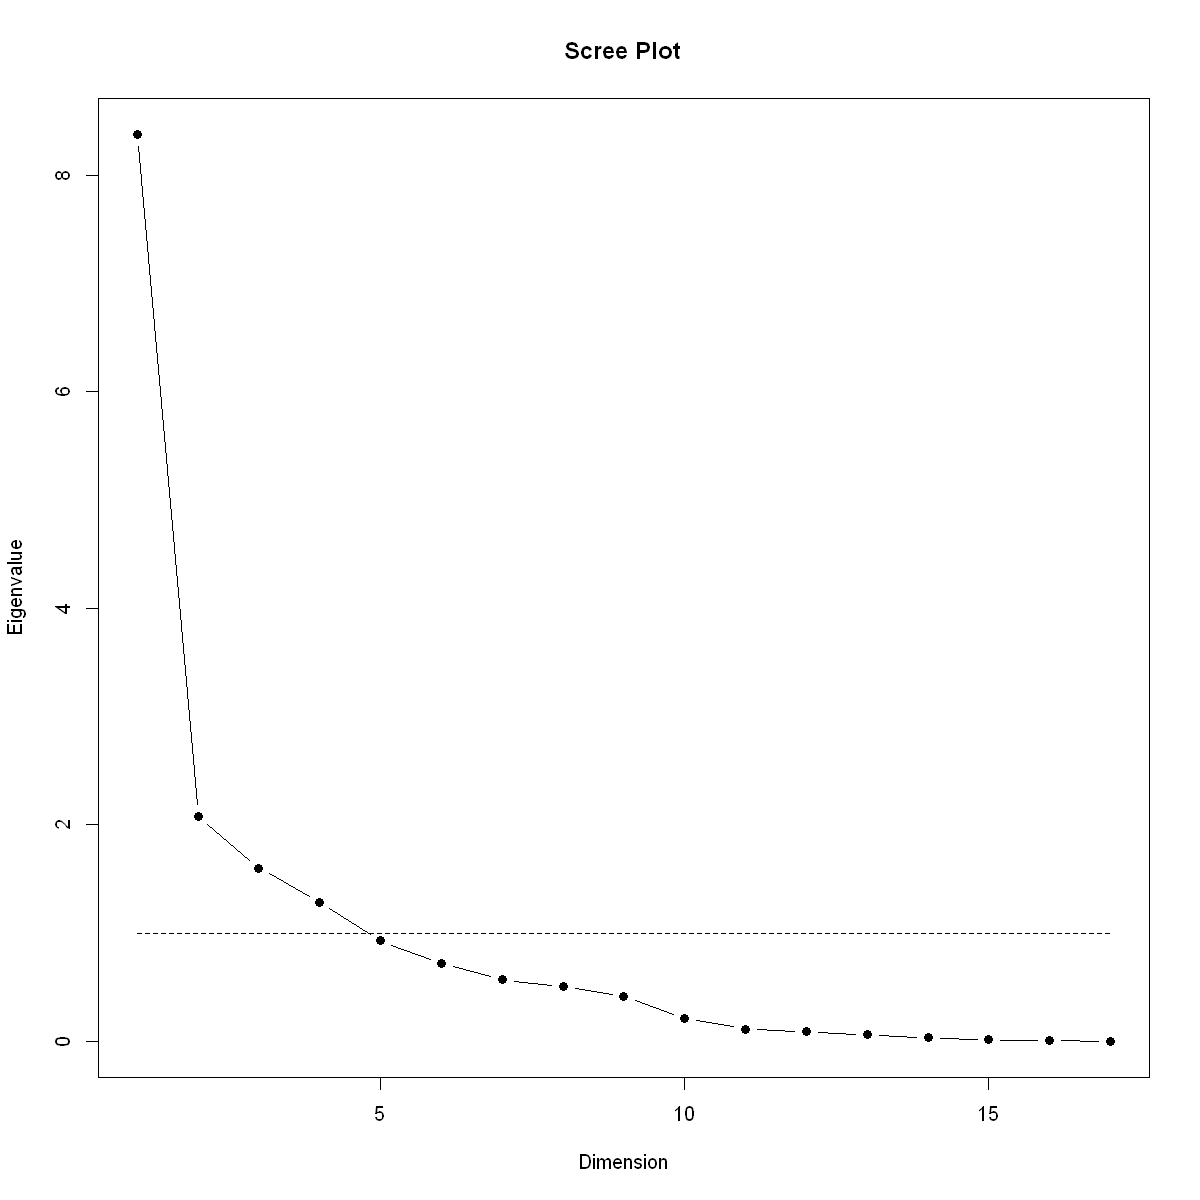

In [33]:
options(repr.plot.width=10, repr.plot.height=10)
scree.plot(fit$correlation)

simple = five factors

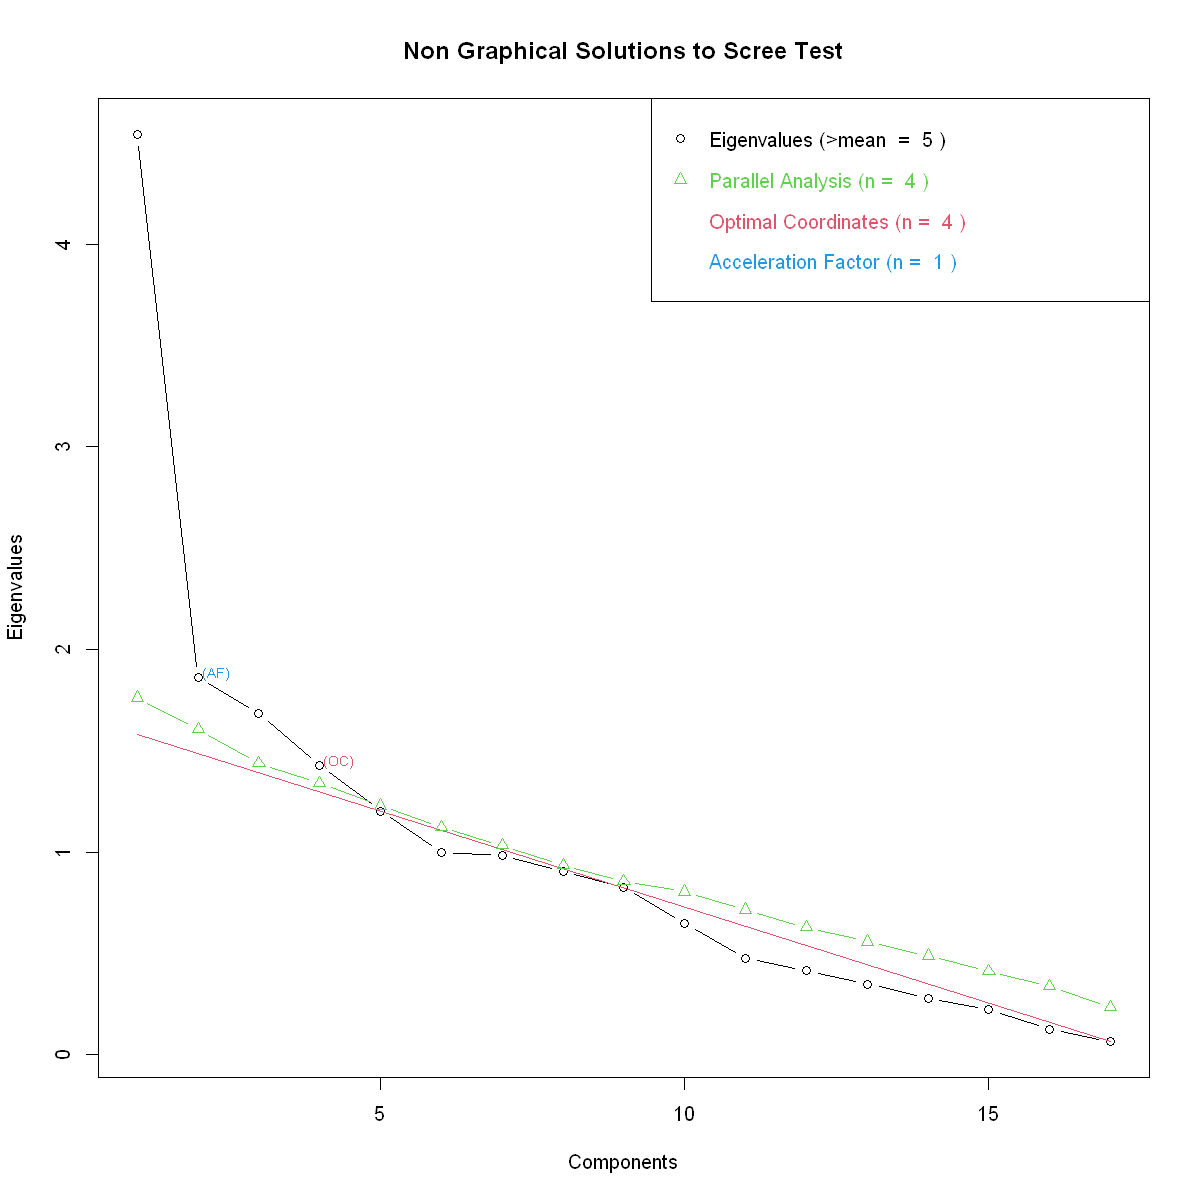

In [34]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
df.wa.nocountry <- df.wa[,c(2:18)]

options(repr.plot.width=10, repr.plot.height=10)
ev <- eigen(cor(df.wa.nocountry)) # get eigenvalues
ap <- parallel(subject=nrow(df.wa.nocountry),var=ncol(df.wa.nocountry), rep=100, cent=.05)
nS <- nScree(x=ev$values, aparallel=ap$eigen$qevpea)
plotnScree(nS)


In [35]:
solution.mr <- fa(r = cor(df.wa.nocountry), nfactors = 5, rotate = "oblimin", fm = "minrank" , scores= "tenBerge" , impute ="mean", max.iter = 1000)

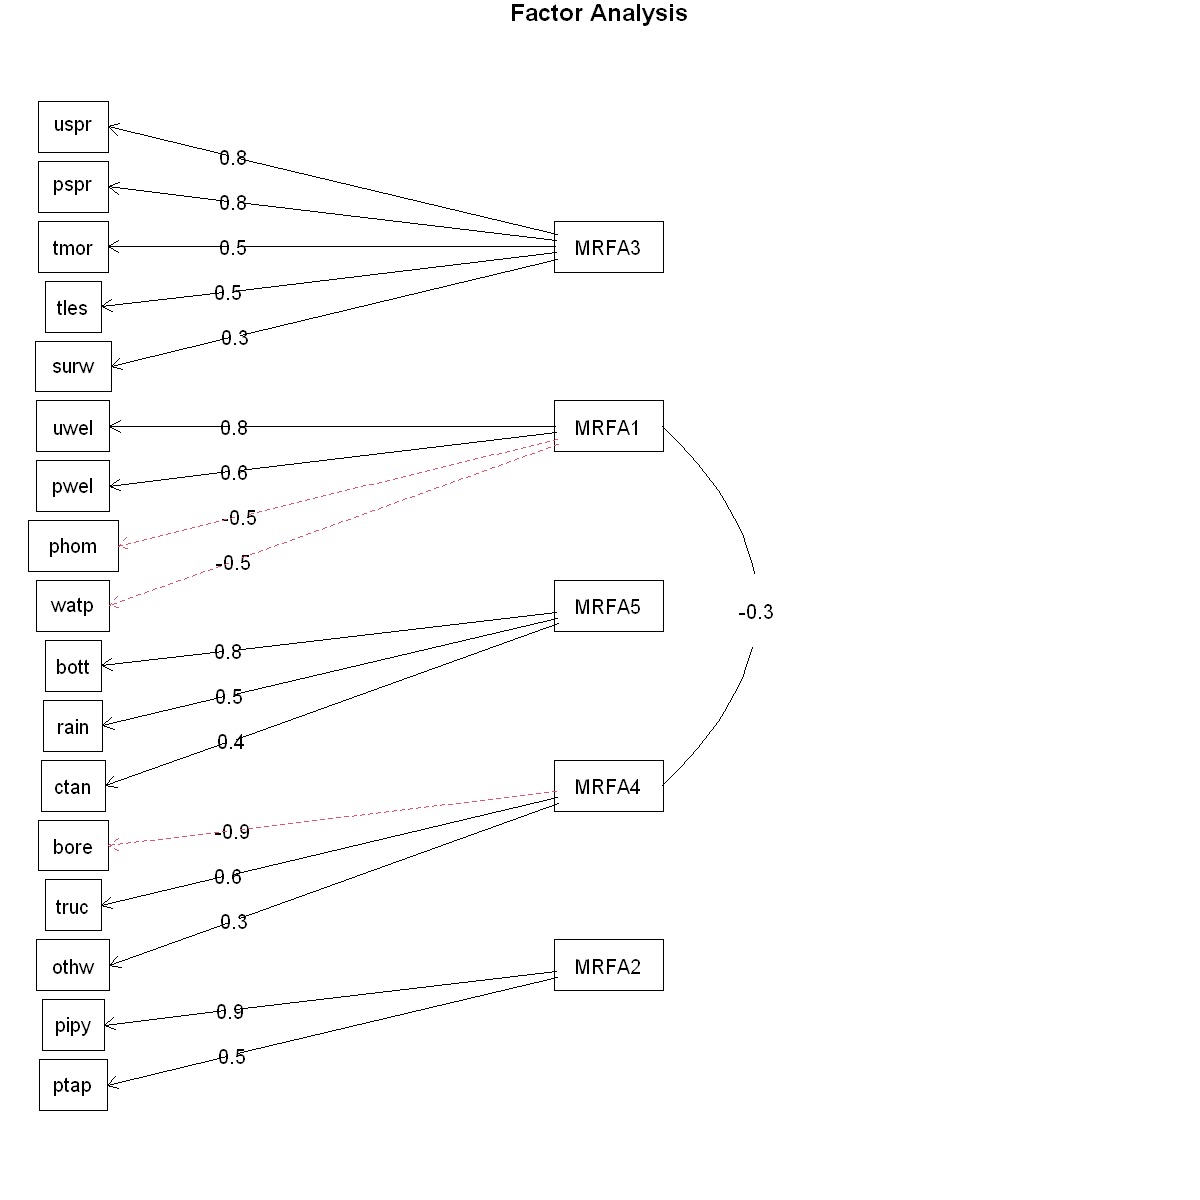

In [36]:
fa.diagram(solution.mr)

# FA

The goal of this study is to analyze the characteristics of water accessibility

sources: http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/115-famd-factor-analysis-of-mixed-data-in-r-essentials/

In [37]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)



In [38]:
res.famd <- FAMD(df.wa, graph = FALSE)
print(res.famd)

*The results are available in the following objects:

  name          description                             
1 "$eig"        "eigenvalues and inertia"               
2 "$var"        "Results for the variables"             
3 "$ind"        "results for the individuals"           
4 "$quali.var"  "Results for the qualitative variables" 
5 "$quanti.var" "Results for the quantitative variables"


# Eigenvalues / Variances

In [39]:
eig.val <- get_eigenvalue(res.famd)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,5.539480,6.224135,6.224135
Dim.2,2.859088,3.212458,9.436593
Dim.3,2.684249,3.016010,12.452603
Dim.4,2.426039,2.725886,15.178489
Dim.5,2.202044,2.474207,17.652695


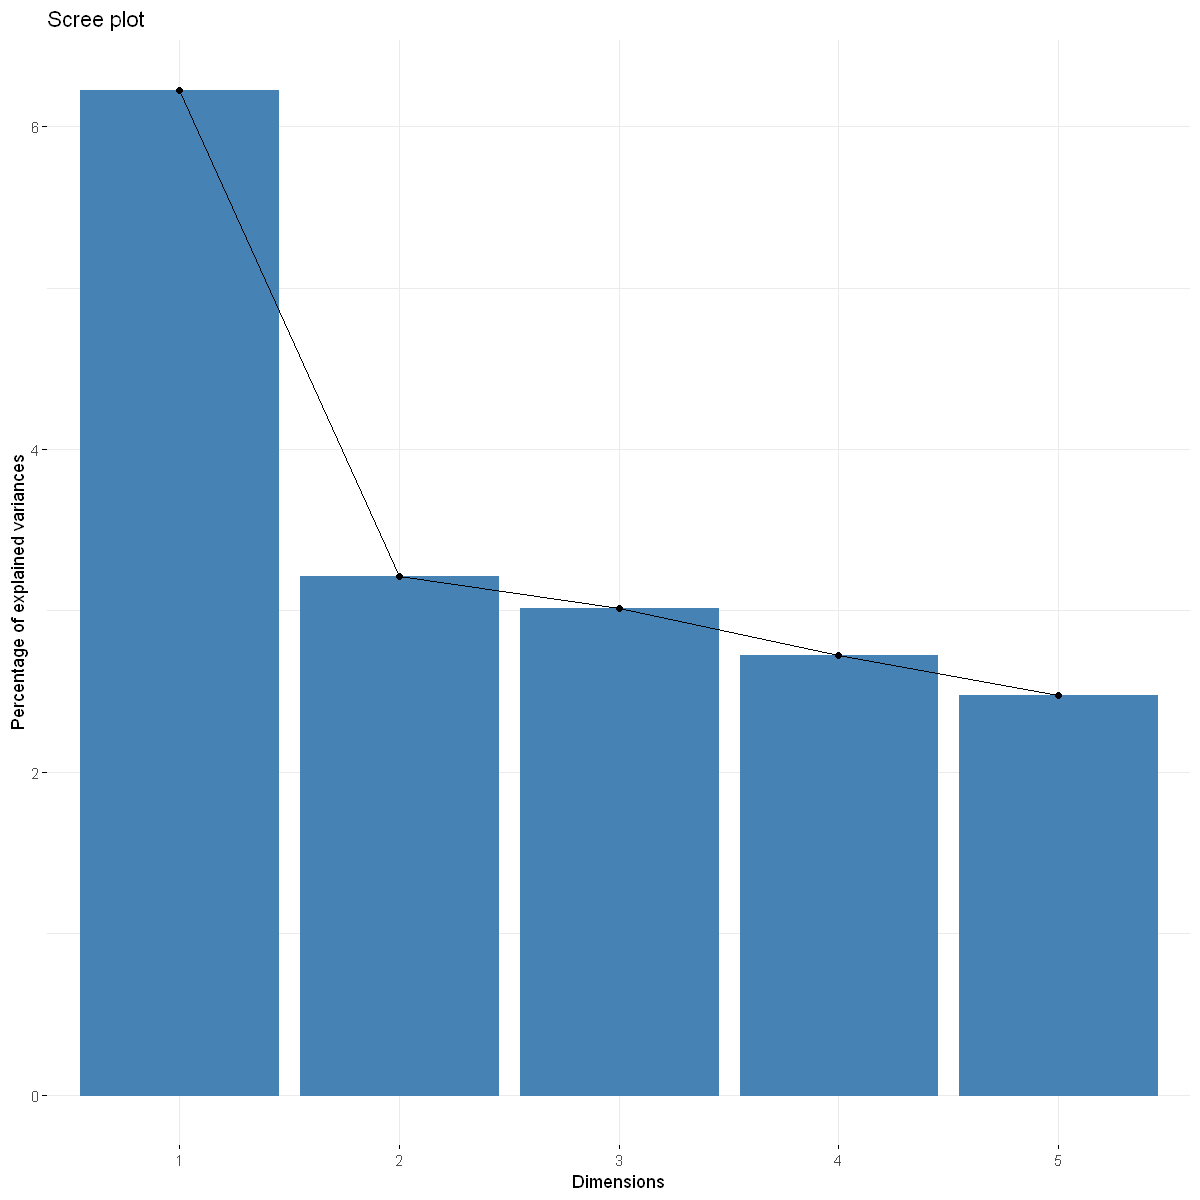

In [40]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_screeplot(res.famd)

#  All variables

In [41]:
var <- get_famd_var(res.famd)
var

FAMD results for variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

In [42]:
# Coordinates of variables
head(var$coord,7)
# Cos2: quality of representation on the factore map
head(var$cos2,7)
# Contributions to the  dimensions
head(var$contrib,7)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
phom,0.46714940,0.02046967,0.03805951,0.017809275,2.059559e-01
pipy,0.02603734,0.33601967,0.15060937,0.014002234,2.333547e-01
ptap,0.31996596,0.27069759,0.09238902,0.003979922,2.274144e-02
bore,0.08413900,0.32537180,0.04038374,0.192573041,3.165913e-07
pwel,0.14443554,0.21087906,0.02334498,0.149314789,1.371690e-02
pspr,0.12565909,0.19764675,0.30415850,0.006196665,8.822260e-02
rain,0.06551953,0.01517177,0.17286364,0.012872605,1.592494e-01


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
phom,0.2182285610,0.0004190075,0.0014485266,3.171703e-04,4.241783e-02
pipy,0.0006779433,0.1129092193,0.0226831837,1.960626e-04,5.445443e-02
ptap,0.1023782137,0.0732771870,0.0085357306,1.583978e-05,5.171731e-04
bore,0.0070793721,0.1058668064,0.0016308461,3.708438e-02,1.002300e-13
pwel,0.0208616242,0.0444699785,0.0005449882,2.229491e-02,1.881534e-04
pspr,0.0157902057,0.0390642359,0.0925123911,3.839866e-05,7.783228e-03
rain,0.0042928083,0.0002301826,0.0298818390,1.657040e-04,2.536039e-02


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
phom,8.4330911,0.7159512,1.4178834,0.7340886,9.352942e+00
pipy,0.4700323,11.7526886,5.6108580,0.5771645,1.059719e+01
ptap,5.7761009,9.4679710,3.4418951,0.1640502,1.032742e+00
bore,1.5188971,11.3802665,1.5044708,7.9377559,1.437716e-05
pwel,2.6073844,7.3757466,0.8697027,6.1546742,6.229168e-01
pspr,2.2684274,6.9129305,11.3312345,0.2554232,4.006396e+00
rain,1.1827739,0.5306507,6.4399269,0.5306018,7.231893e+00


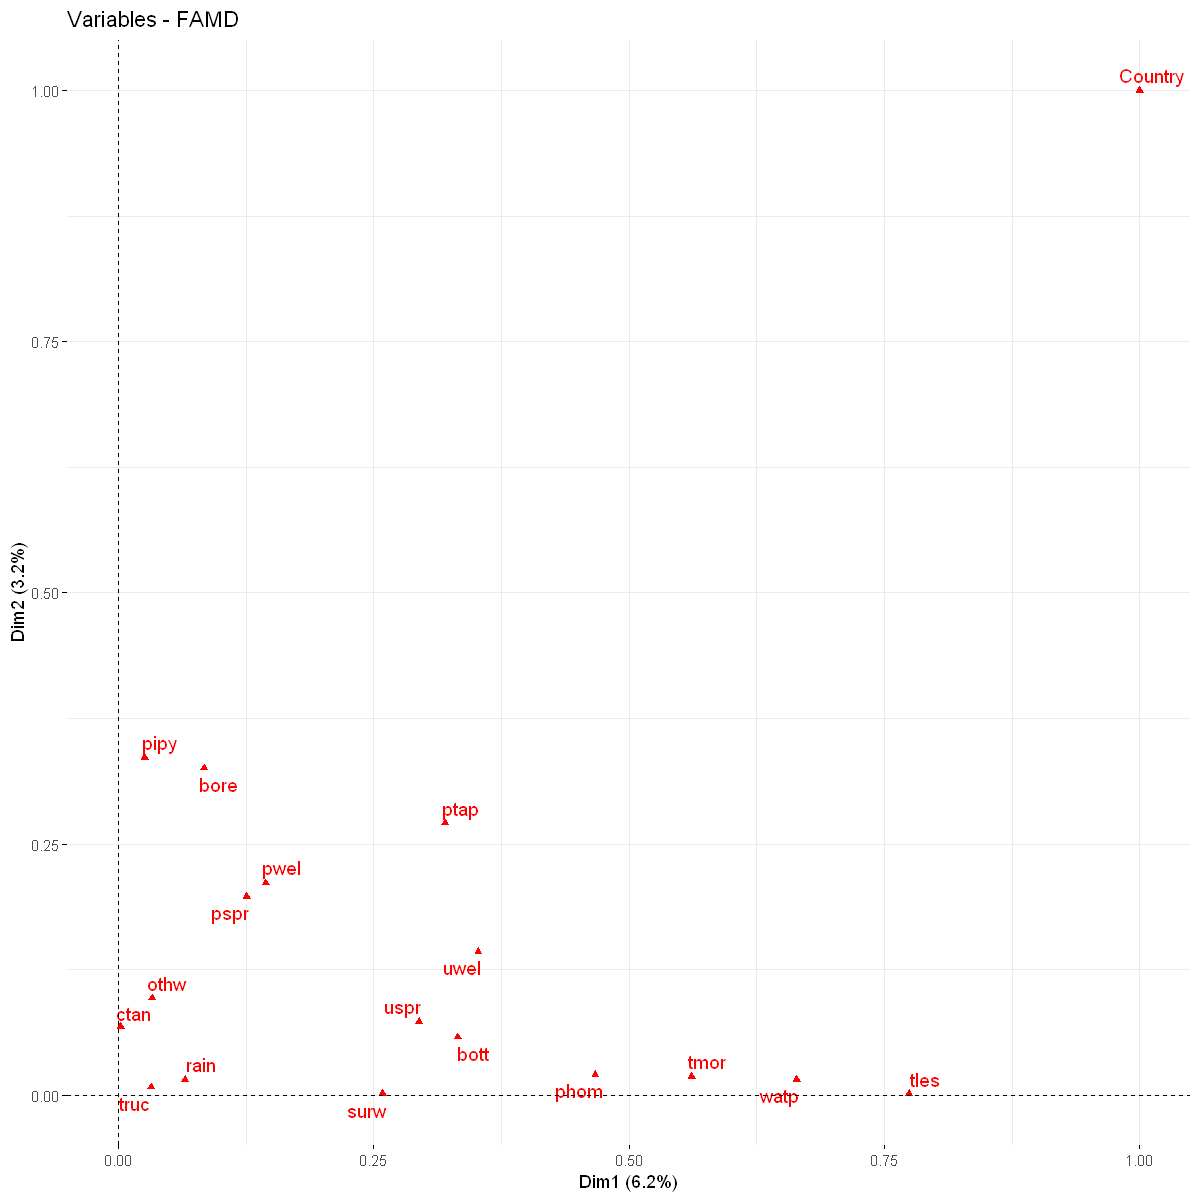

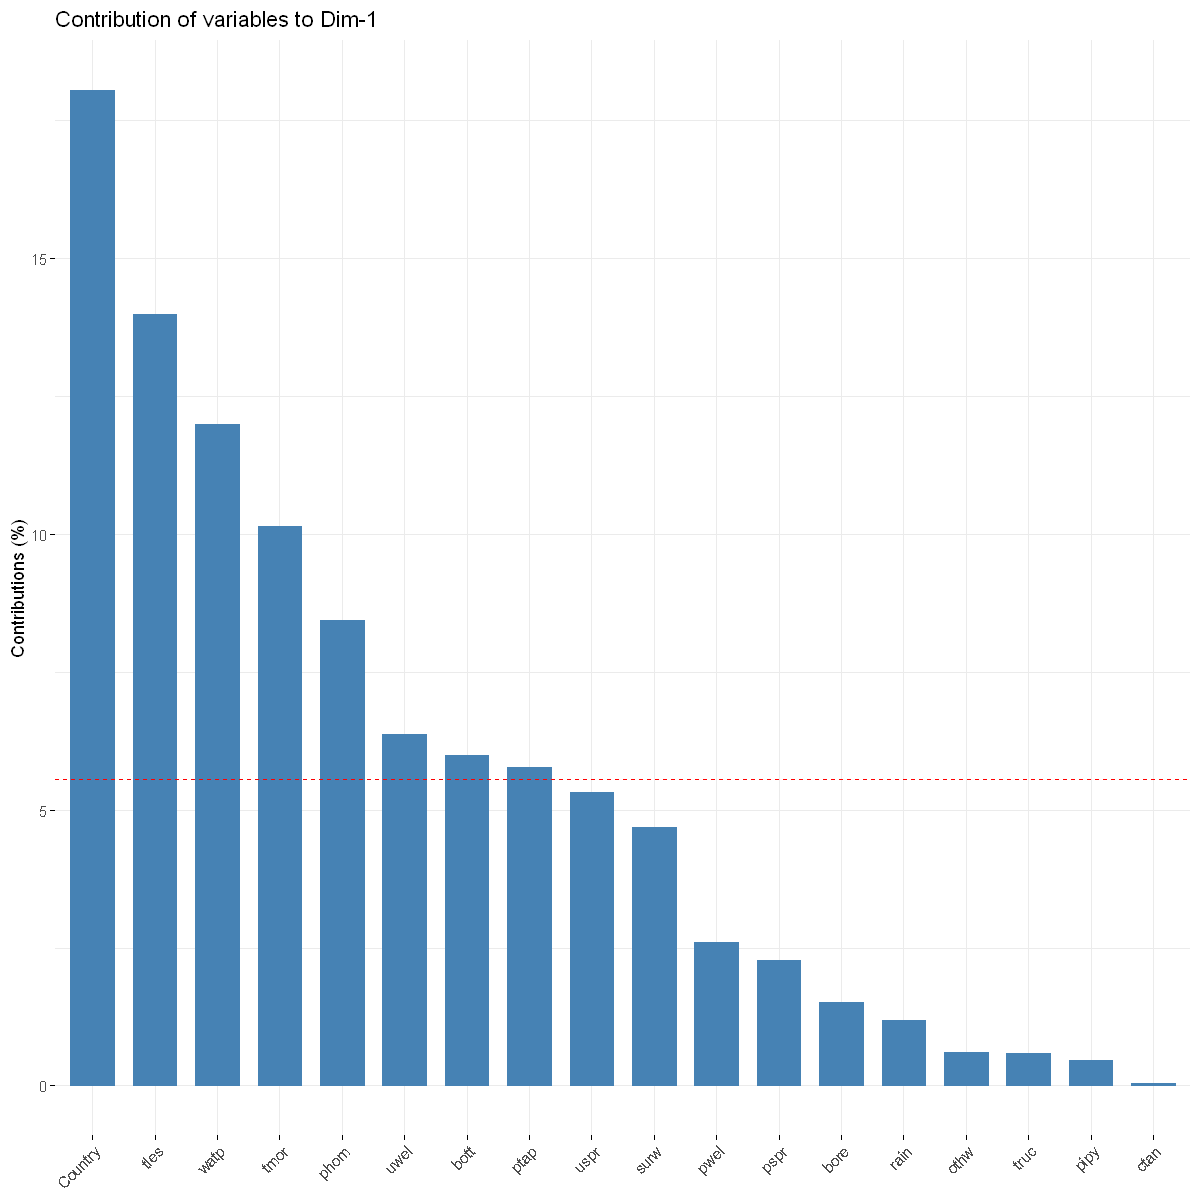

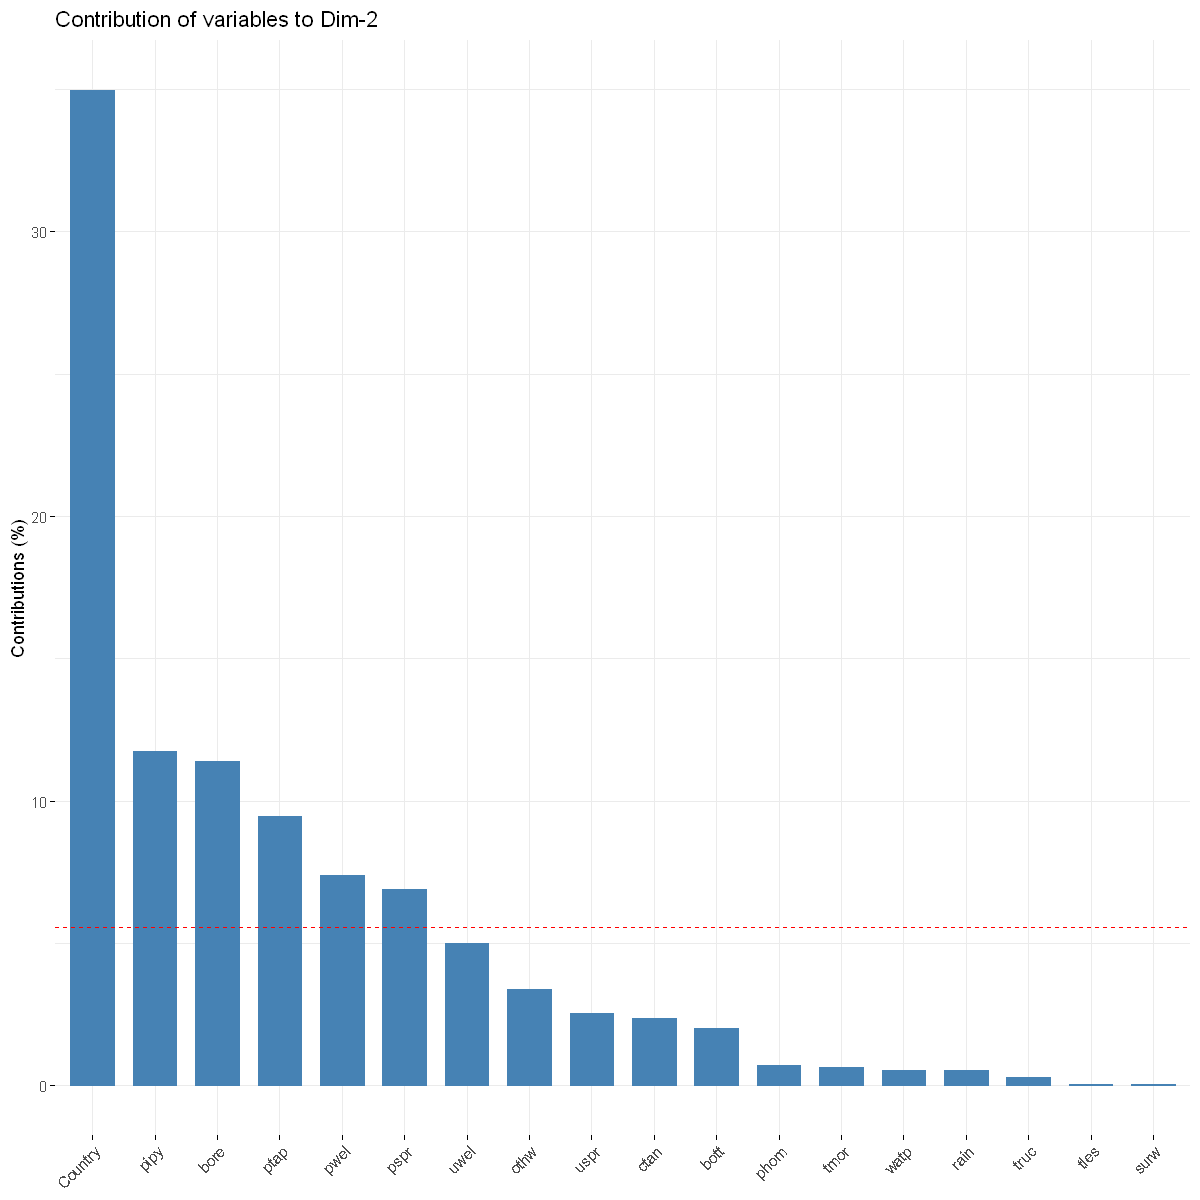

In [43]:
# Plot of variables
fviz_famd_var(res.famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(res.famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(res.famd, "var", axes = 2)

The red dashed line on the graph above indicates the expected average value, If the contributions were uniform.

From the plots above, it can be seen that:

variables that contribute the most to the first dimension are: iwsp and watp.

variables that contribute the most to the second dimension are: basw and ptap.

# Quantitative variables

In [44]:
quanti.var <- get_famd_var(res.famd, "quanti.var")
quanti.var 

FAMD results for quantitative variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

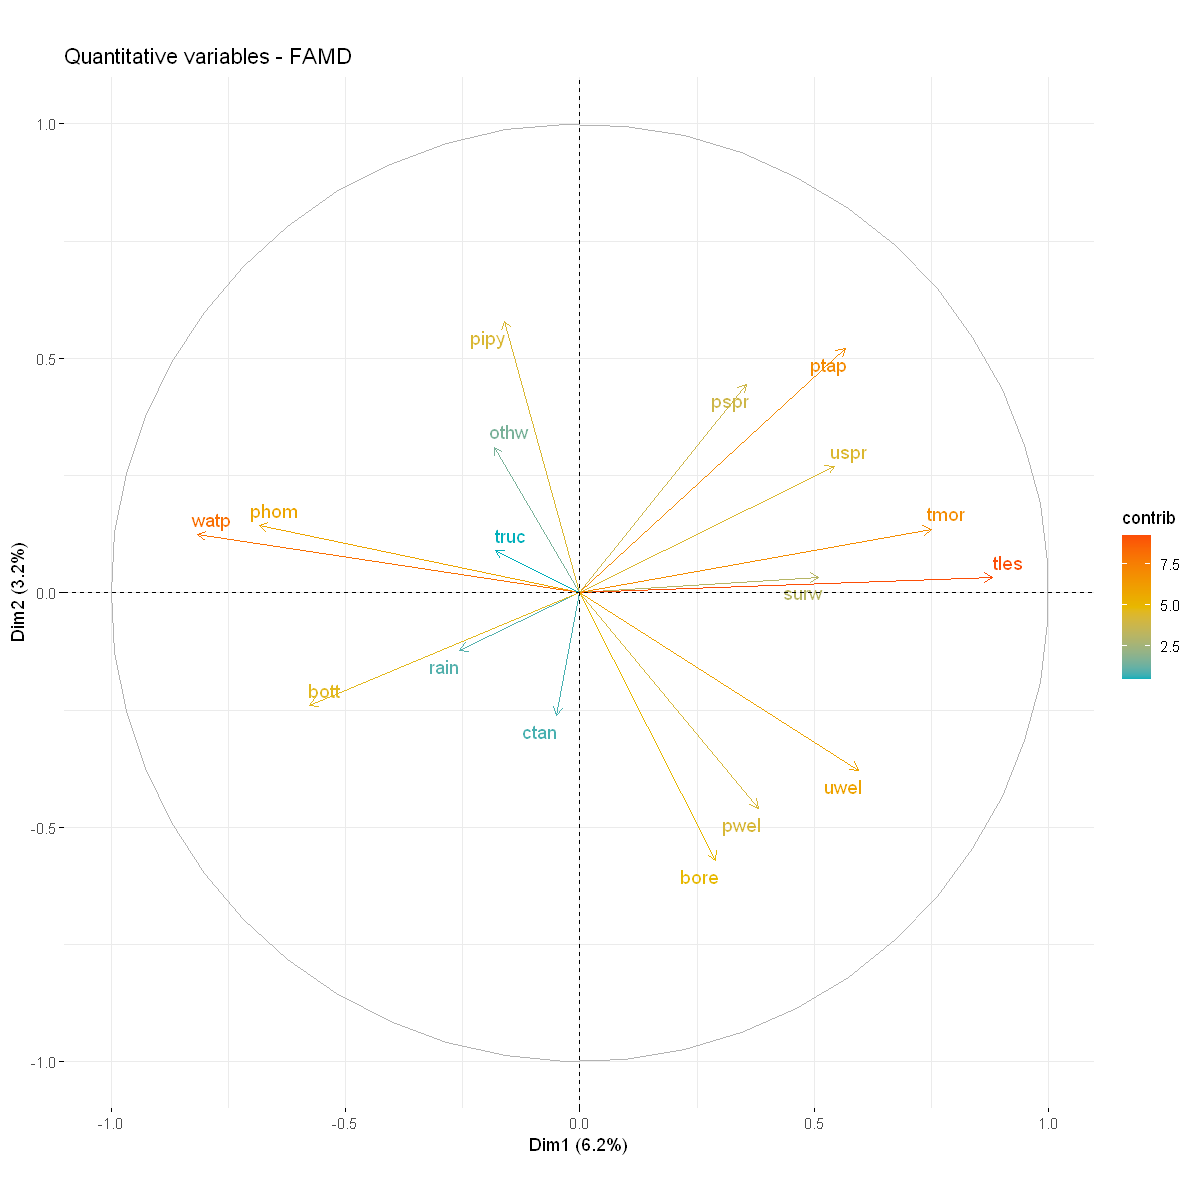

In [45]:
fviz_famd_var(res.famd, "quanti.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

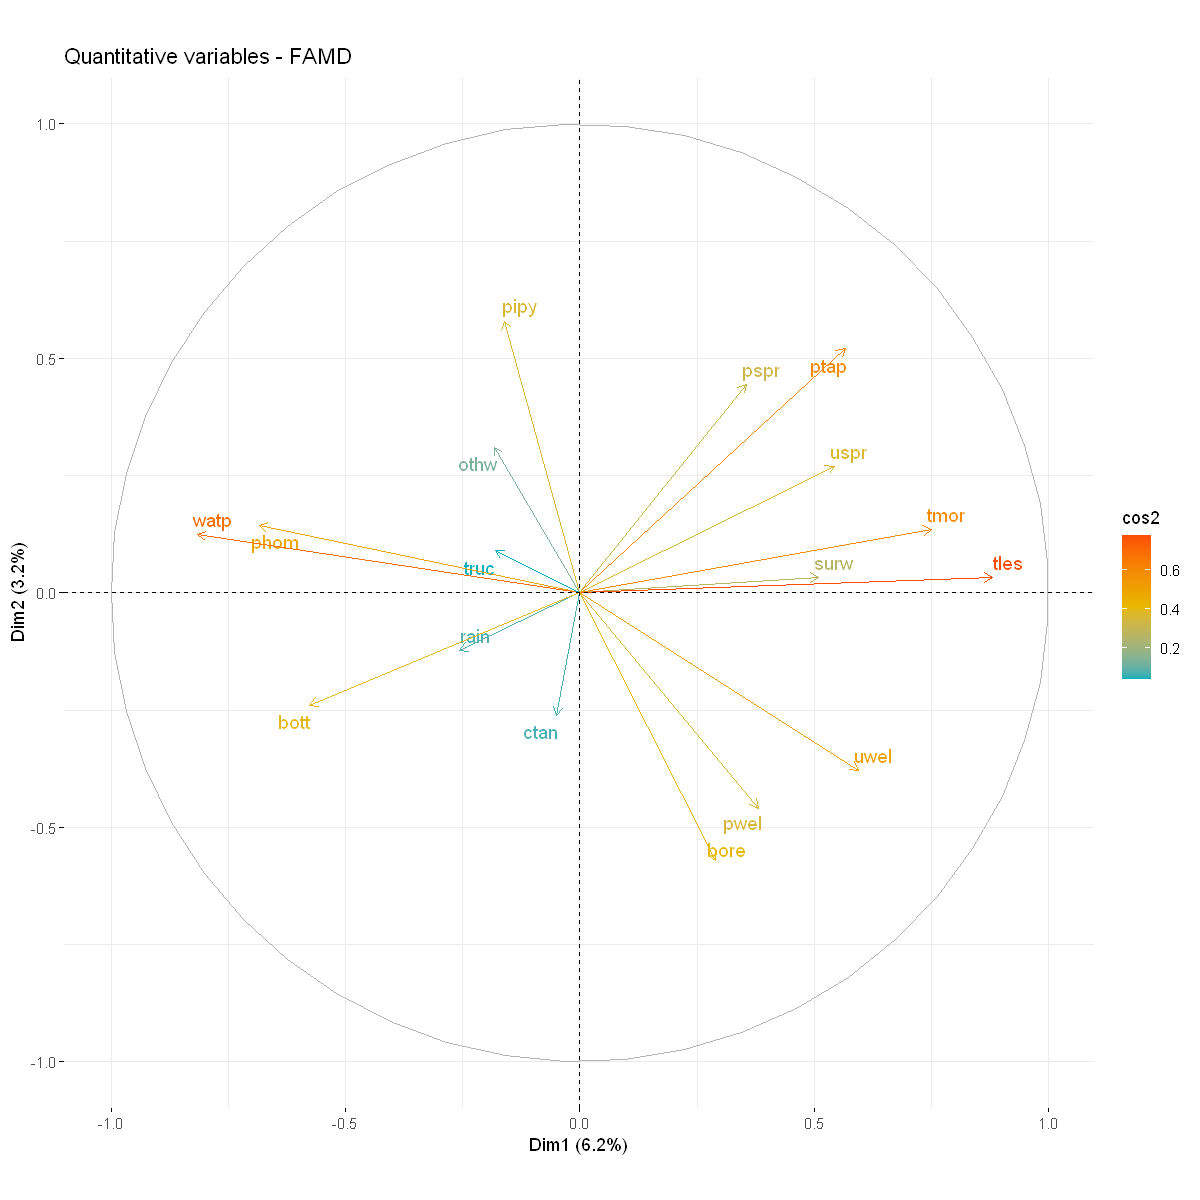

In [46]:
# Color by cos2 values: quality on the factor map
fviz_famd_var(res.famd, "quanti.var", col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE)

# Graph of qualitative variables

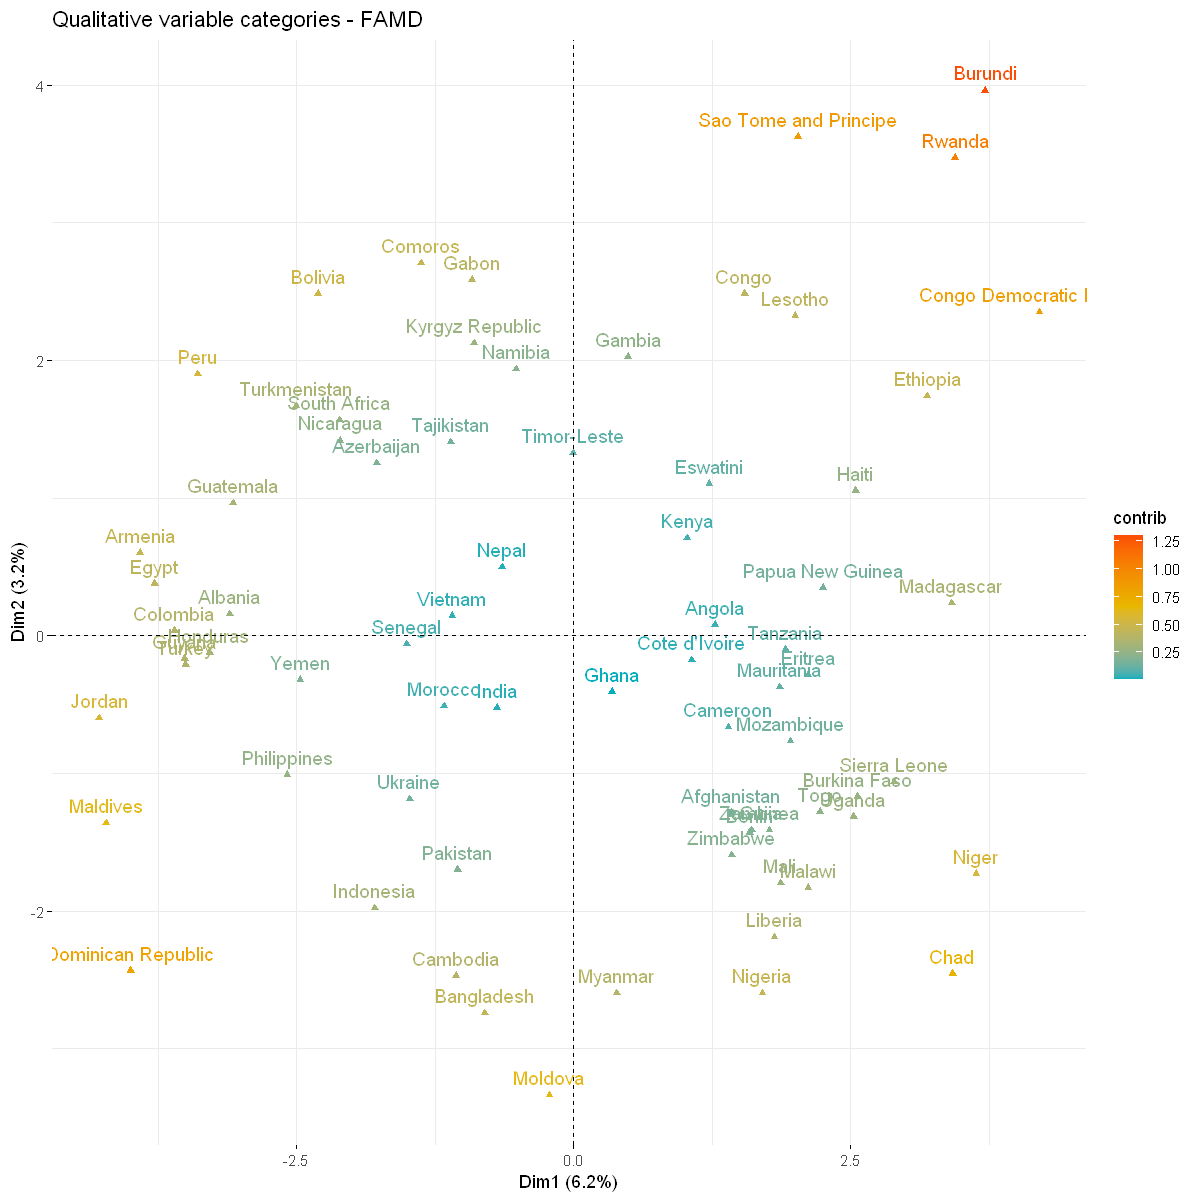

In [47]:
fviz_famd_var(res.famd, "quali.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

# Graph of individuals

In [48]:
ind <- get_famd_ind(res.famd)
ind

FAMD results for individuals 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


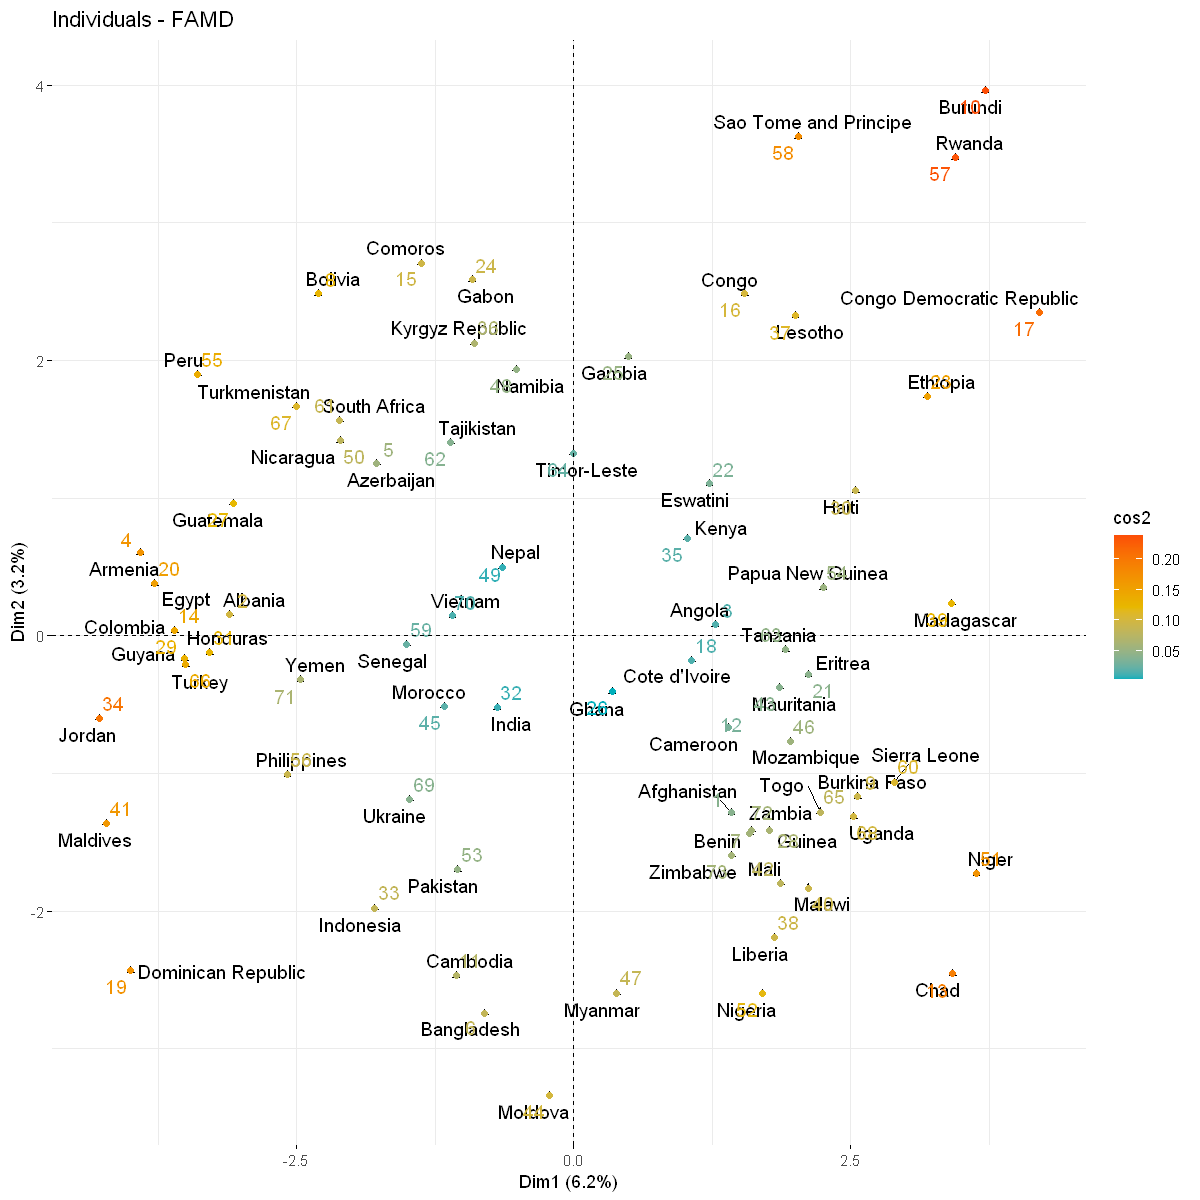

In [49]:
fviz_famd_ind(res.famd, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

The factor analysis of mixed data (FAMD) makes it possible to analyze a data set, in which individuals are described by both qualitative and quantitative variables.

In [50]:
result <- PCA(df.wa[,(2:18)])
result

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 73 individuals, described by 17 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

# PCA

In [51]:
head(df.wa.nocountry,7)

phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5
5.1,4.2,13.0,28.9,4.4,0.3,0.4,20.8,1.2,0.2,0.3,0.0,0.4,5.8,49.8,12.1,37.4


[1] 3066.393

[1] 0.5147075514 0.1342512300 0.0928609720 0.0801728484 0.0540346785
 [6] 0.0254631909 0.0231134594 0.0208454395 0.0168000692 0.0126699205
[11] 0.0071575964 0.0067823512 0.0055828281 0.0036827178 0.0013509700
[16] 0.0003551540 0.0001690227

[1] 0.5147075514 0.1342512300 0.0928609720 0.0801728484 0.0540346785
 [6] 0.0254631909 0.0231134594 0.0208454395 0.0168000692 0.0126699205
[11] 0.0071575964 0.0067823512 0.0055828281 0.0036827178 0.0013509700
[16] 0.0003551540 0.0001690227

[1] 0.5147076 0.6489588 0.7418198 0.8219926 0.8760273 0.9014905 0.9246039
 [8] 0.9454494 0.9622494 0.9749194 0.9820770 0.9888593 0.9944421 0.9981249
[15] 0.9994758 0.9998310 1.0000000

phom       pipy       ptap       bore       pwel       pspr       rain 
18.3136986 11.5917808 12.0095890 13.4315068  6.7465753  3.3424658  2.7424658 
      uwel       uspr       truc       ctan       bott       othw       surw 
 6.8917808  3.8890411  1.4493151  0.5465753  6.7164384  0.4465753  5.2821918 
      tles       tmor       watp 
33.0643836  9.6767123 49.3794521

phom        pipy        ptap        bore        pwel        pspr 
481.0892542 134.0429871 115.7822679 303.6227435  64.2428006  50.7935883 
       rain        uwel        uspr        truc        ctan        bott 
 60.7677549  65.0418760  47.7054338   9.0383676   1.3505784 200.5775038 
       othw        surw        tles        tmor        watp 
  0.6744673  23.8181507 479.8364916 111.2045890 916.8041553

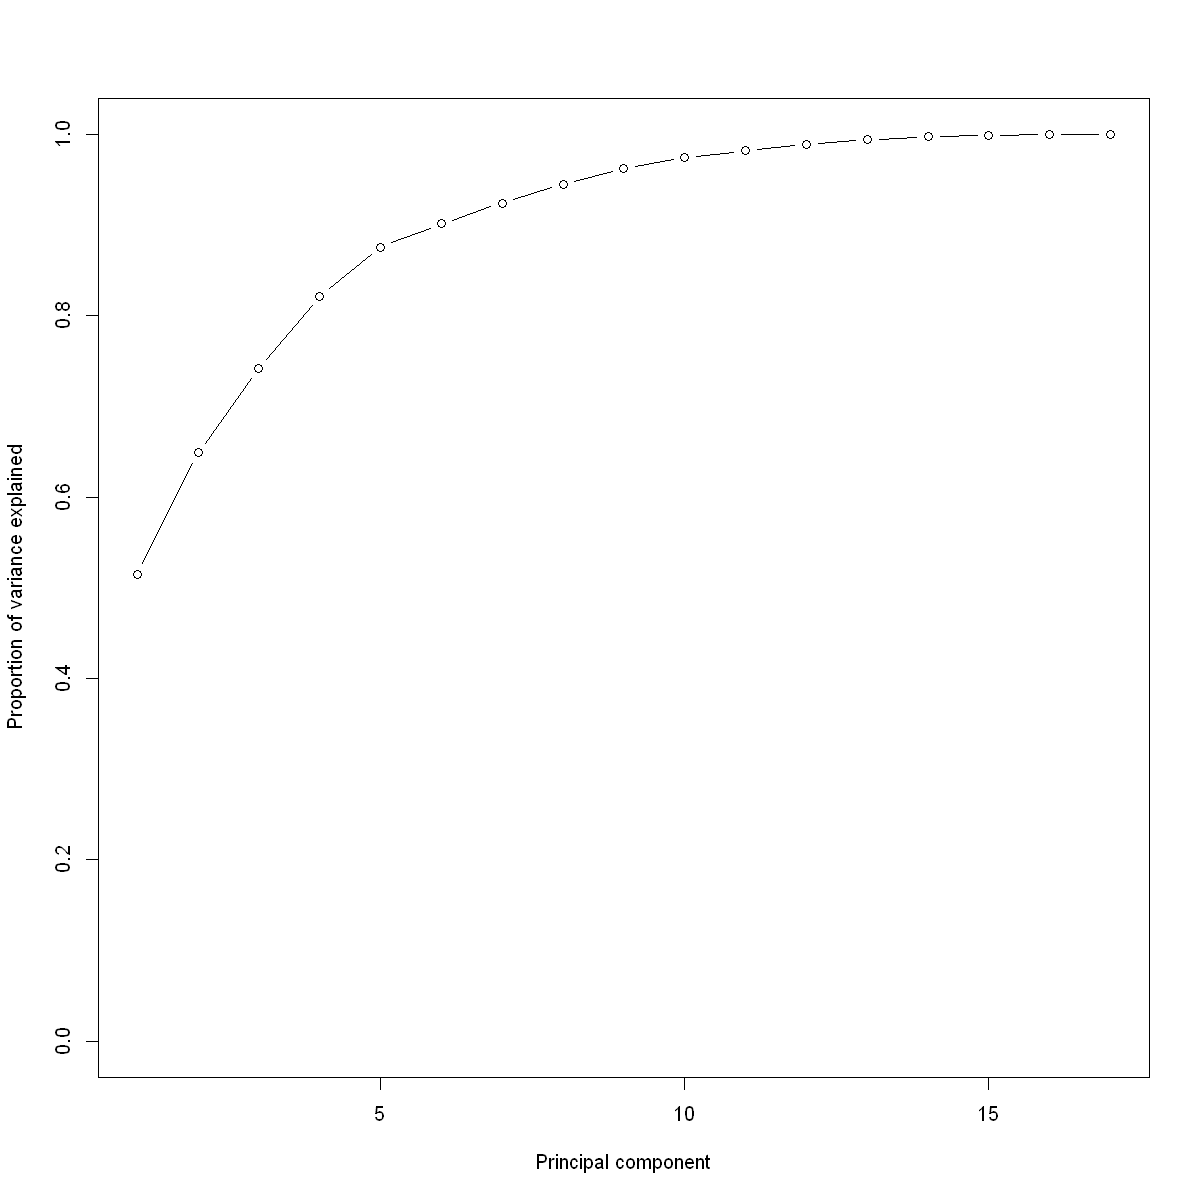

In [52]:
# PCA Scree plot without standardizing data
hpca_dfsimple <- prcomp(df.wa.nocountry, scale=FALSE) # Scale to 0 to 1 # We can extract the information summarized above (and much more) # from the attributes of the object hpca_dfsimple

standard_deviation_of_each_component <- hpca_dfsimple$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_tot
var_per_dim/var_tot

var_prop <- var_per_dim / sum(var_per_dim)
var_prop

cum_var <- cumsum(var_prop)
cum_var
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')

apply(df.wa.nocountry, 2, mean)
apply(df.wa.nocountry, 2, var)



PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9 PC10 PC11 PC12 PC13 PC14 PC15 PC16 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
PC17 
   1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
phom,0.32079297,0.10493141,-0.150324070,0.11175255,-0.4139300458,0.092148438,-0.01396518,0.287001462,-0.259406999,0.21658823,-0.10776614,-0.301396592,0.05613426,-0.06113830,-0.23353917,0.24210726,0.50189612
pipy,0.07573476,0.42514044,-0.299035612,-0.09909072,0.4406037226,-0.128743843,-0.14216628,0.176513238,0.302075104,-0.09624542,-0.25235107,0.266099122,-0.25172676,-0.05832224,0.05182939,0.14306140,0.35676427
ptap,-0.26549041,0.38158585,-0.234210890,-0.05282890,0.1375462762,0.032859334,-0.22647600,-0.237554900,0.028789717,0.04727693,0.35478196,-0.252216936,0.43729619,0.03084595,-0.27563118,-0.32861269,0.17278071
bore,-0.13614310,-0.41835023,-0.154846059,-0.36747861,0.0005132032,-0.298614301,0.33337919,-0.207846328,-0.164274013,-0.31708142,-0.11991744,0.043991074,-0.01154625,-0.06185554,-0.18559251,-0.17428744,0.43737359
pwel,-0.17837499,-0.33679590,-0.117731773,0.32358303,-0.1068237605,0.147892907,-0.39671194,0.296026709,0.060303571,-0.35685416,0.27201577,0.370959836,-0.03687985,0.06807961,-0.31424047,0.04640290,0.09169448
pspr,-0.16637723,0.32605803,0.424958858,-0.06591941,-0.2709129623,-0.116036028,-0.20006152,-0.106853916,-0.052894651,-0.31670198,0.06195586,-0.243252136,-0.55495959,0.20236545,-0.04654288,-0.10104611,0.12390407
rain,0.12013853,-0.09033752,0.320367712,-0.09500961,0.3639810809,0.675966170,0.16170659,-0.150940291,0.137675388,-0.16052872,-0.07592441,-0.145452615,0.03214816,0.14914303,-0.26603189,0.18707174,0.16342635
uwel,-0.27874054,-0.27729254,-0.247213821,0.16854482,0.0918272577,0.193083953,-0.11494308,-0.130620799,-0.025080763,0.50770309,-0.17966121,-0.078280843,-0.36789703,0.38305405,0.11621328,-0.23817986,0.17547606
uspr,-0.25468140,0.19835885,0.445652496,0.01845581,-0.0861480261,-0.001256426,0.09011223,0.229476743,-0.140947717,0.13402370,-0.31555338,0.440928929,0.38103224,0.25491514,0.02692842,-0.19955752,0.21472082
truc,0.08436326,0.06578918,-0.057902676,0.53145233,-0.2492012146,-0.103891738,0.36939122,-0.312321307,0.495681248,-0.15243228,0.04906467,0.019548189,0.11468598,0.20109575,0.15637050,0.03200049,0.21231581


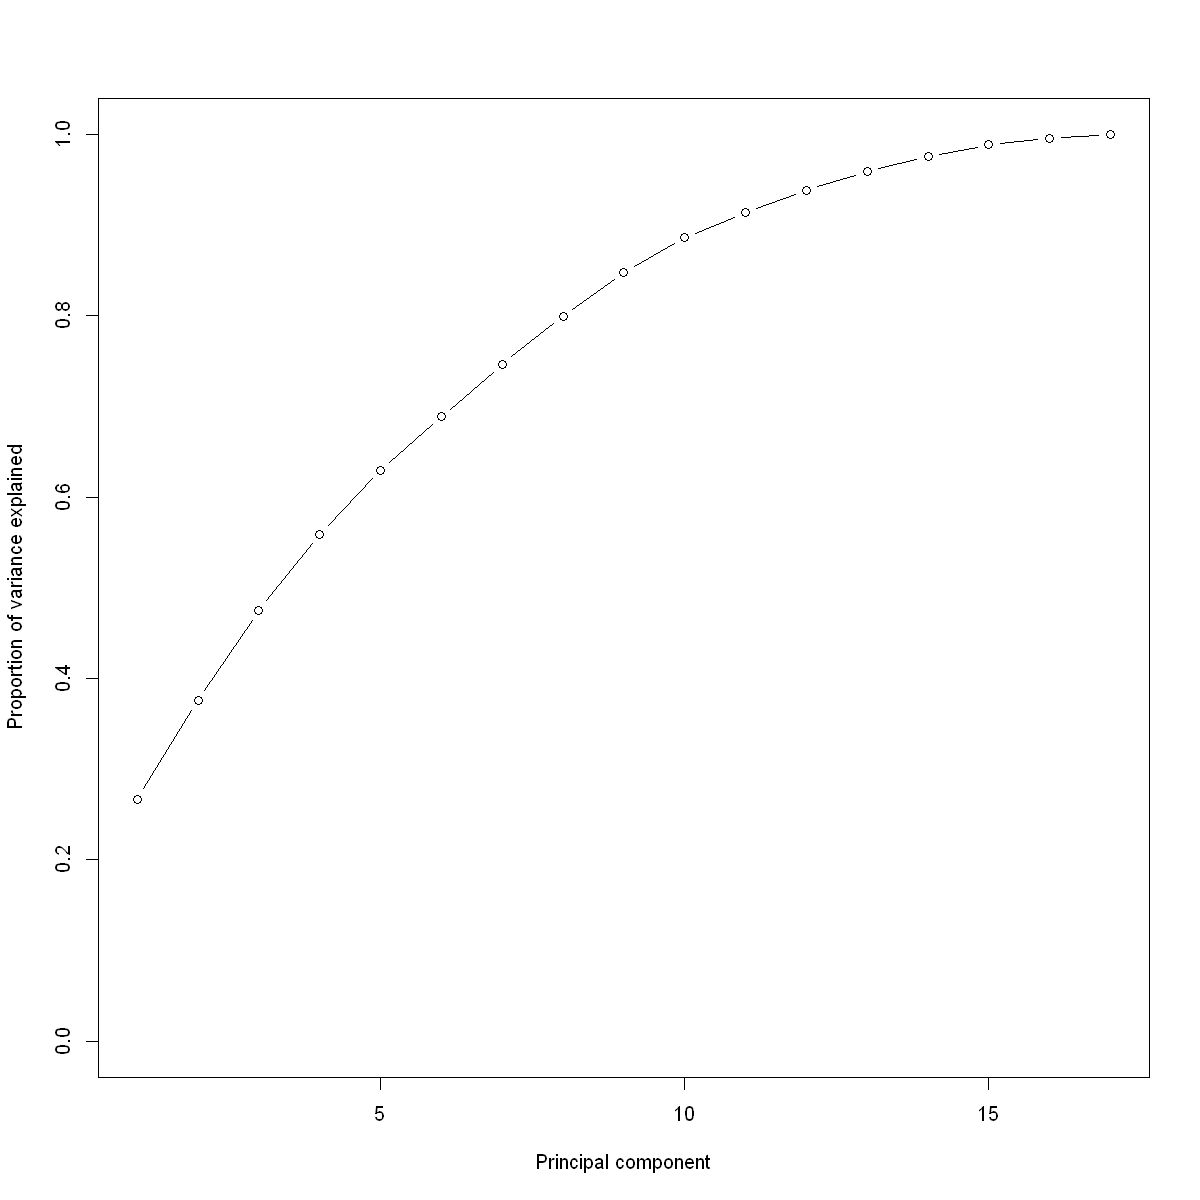

In [53]:
hpca_cor <- prcomp(df.wa.nocountry, scale=TRUE) #Using the correlation matrix to obtain the eigenvalue #Single decomposition of the variance matrix.
standard_deviation_of_each_component <- hpca_cor$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_prop <- var_per_dim / sum(var_per_dim)
cum_var <- cumsum(var_prop)
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
eigenvectors <- hpca_cor$rotation
col.norm(eigenvectors)
eigenvectors

PC_contr <- eigenvectors[,c("PC1")] # Let us plot the contribution of the original dimension to the 1st PCA # PC_contr
ord <- order( -abs(PC_contr) )# We order by the magnitude of the contribution # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord] #PC_contr

tles       watp       tmor       phom       uwel       bott       ptap 
-0.4129968  0.3825272 -0.3517053  0.3207930 -0.2787405  0.2705484 -0.2654904

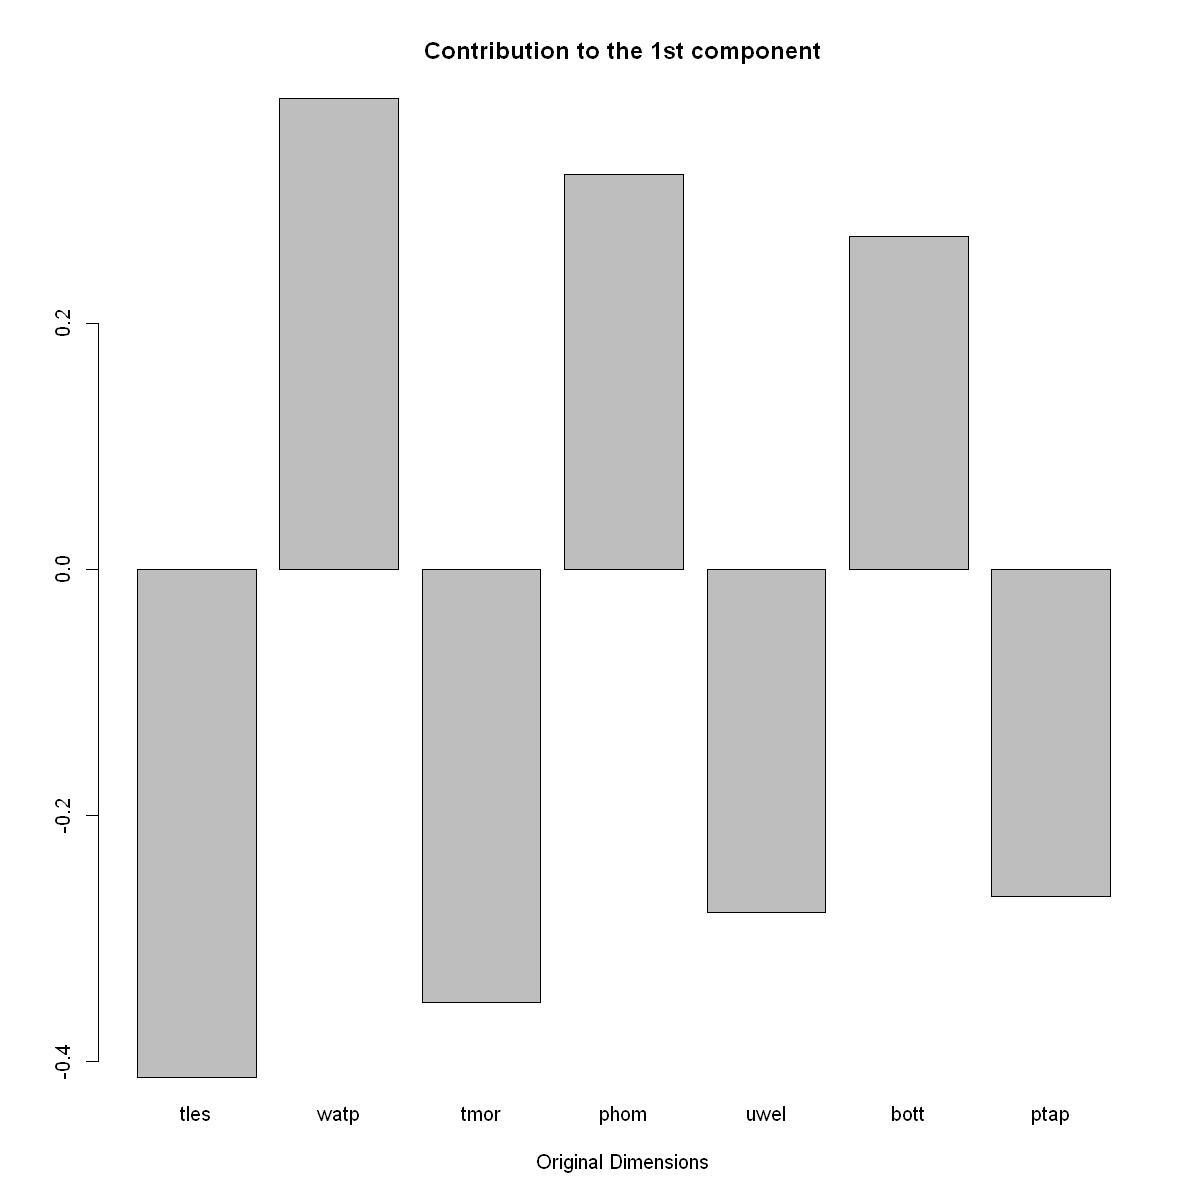

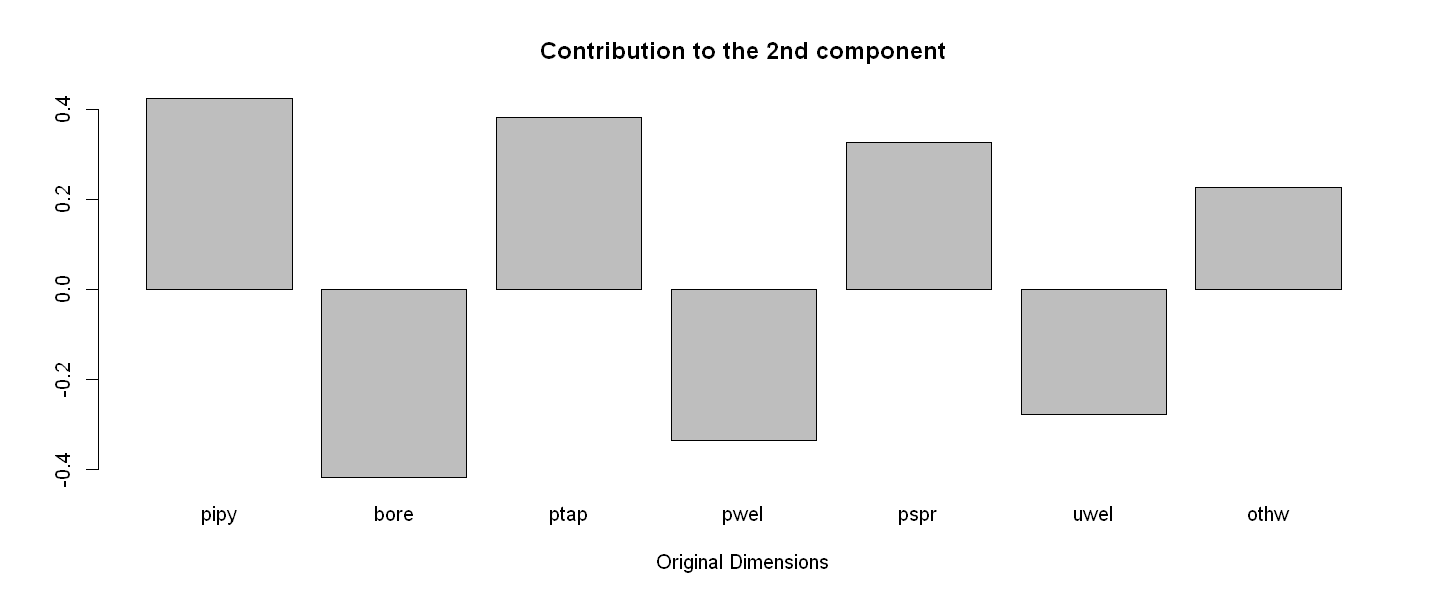

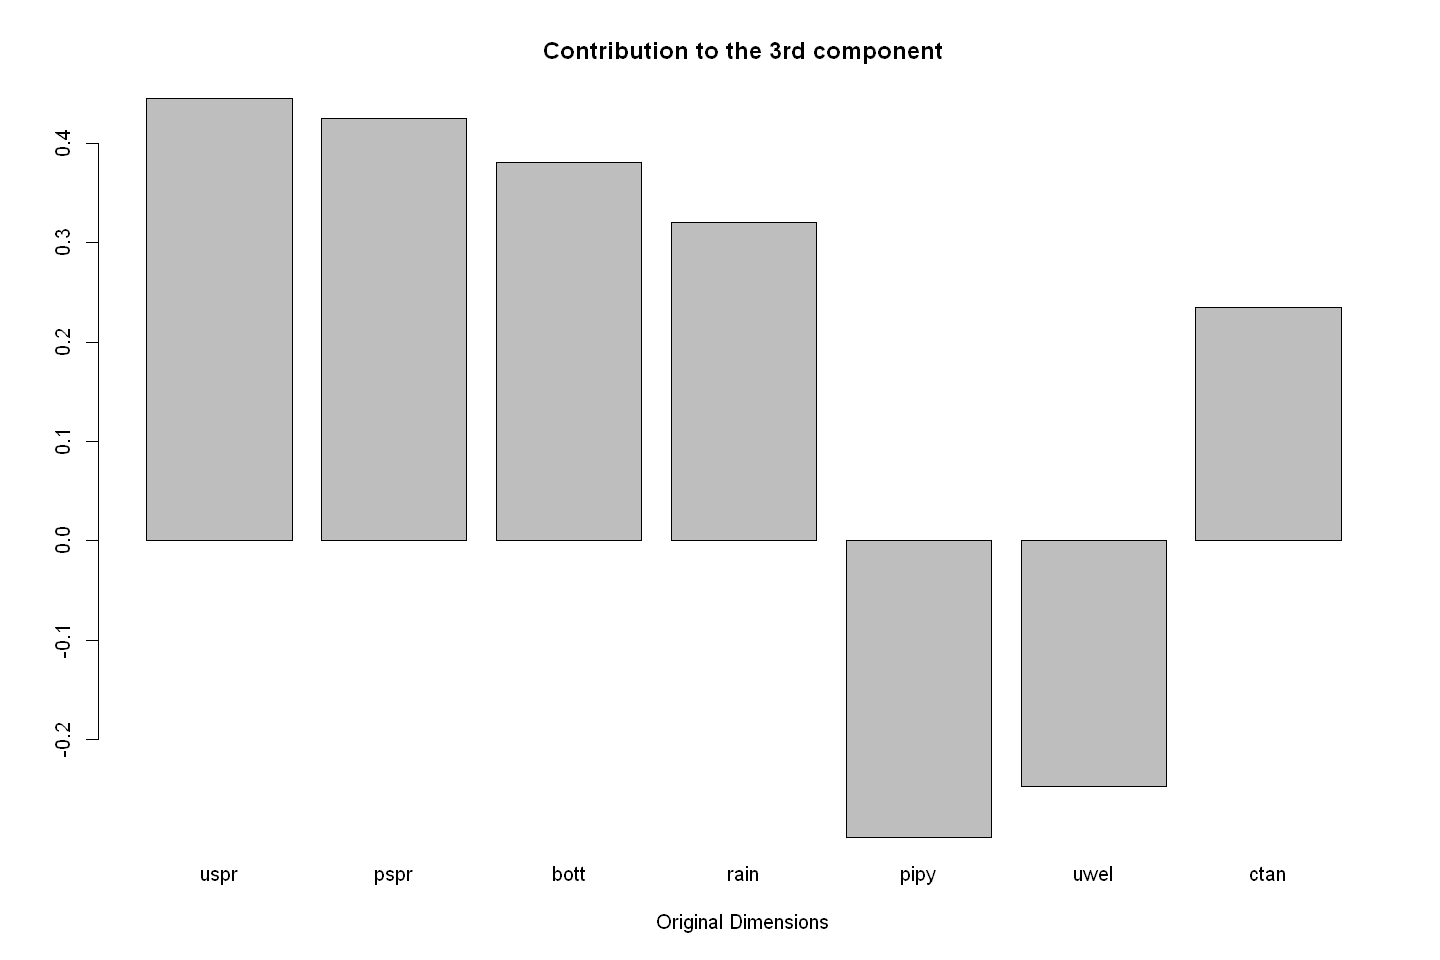

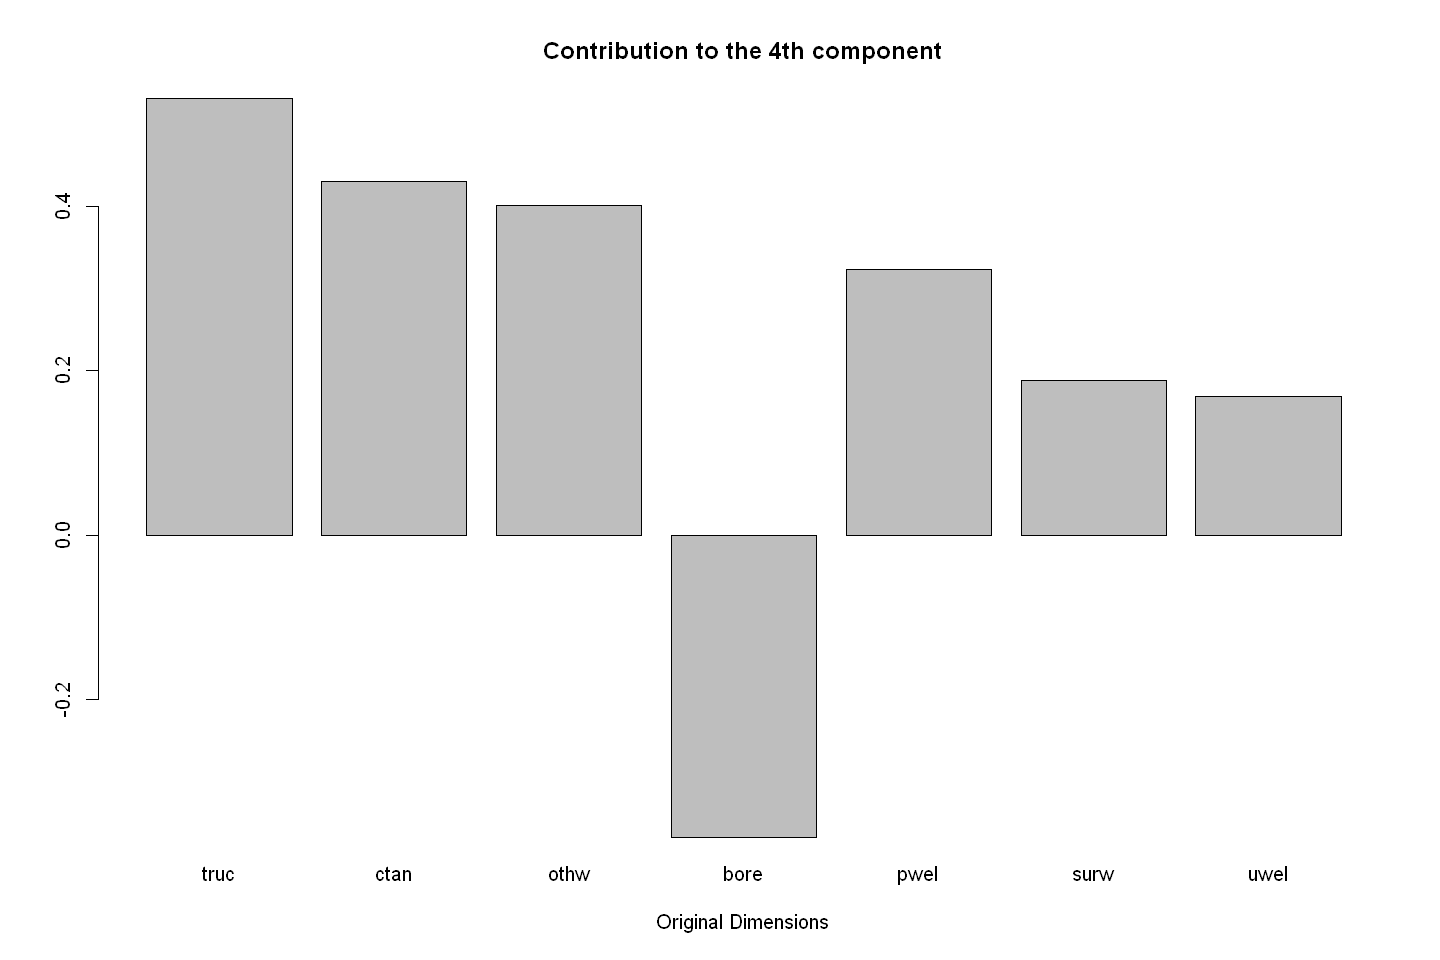

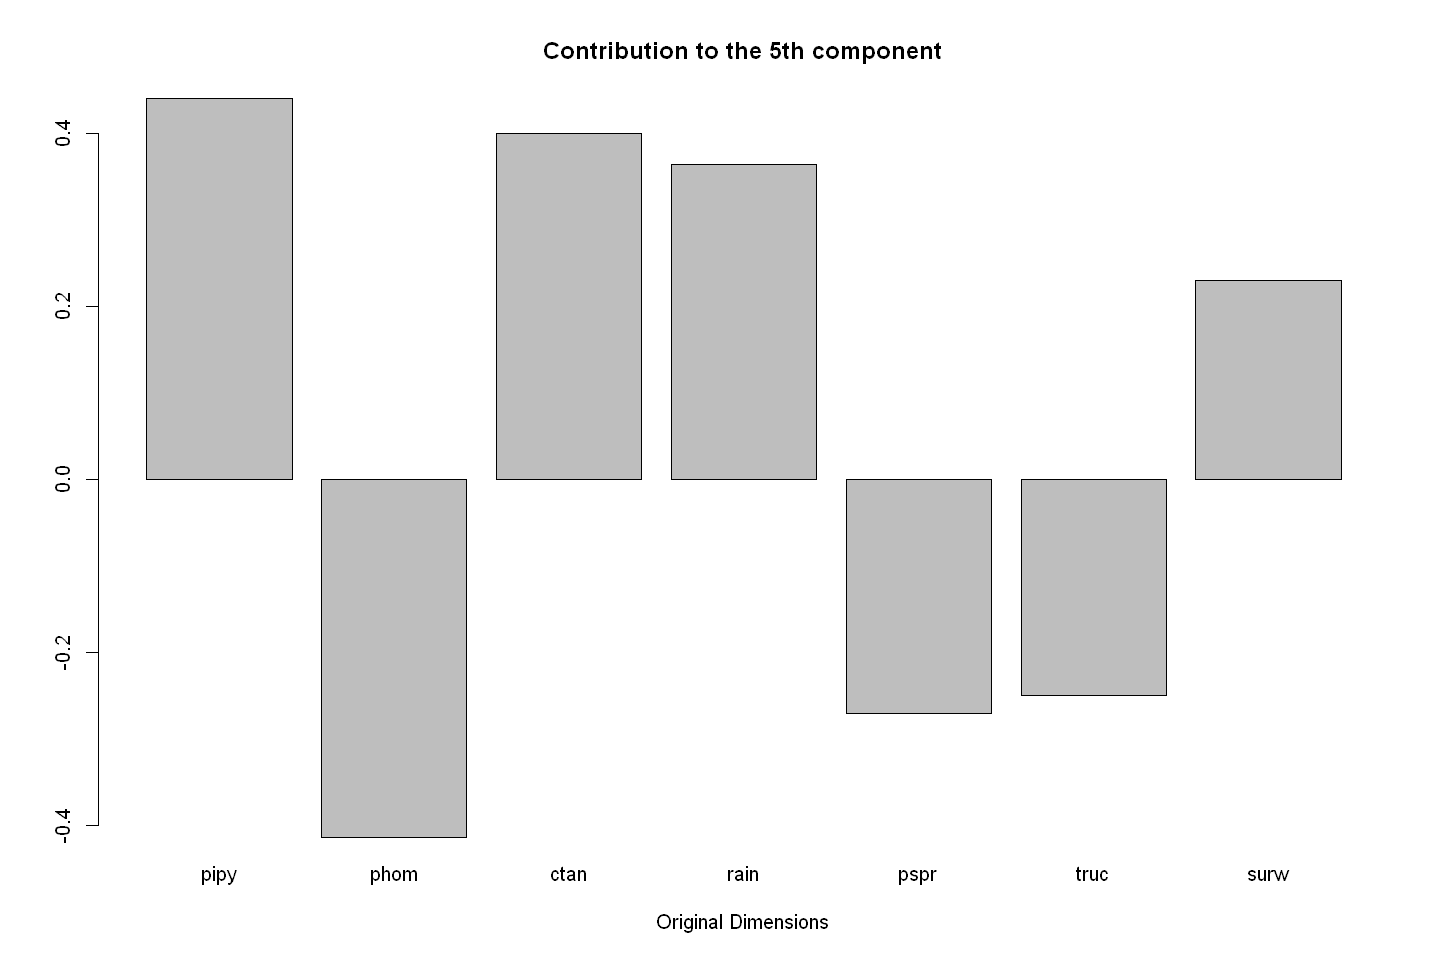

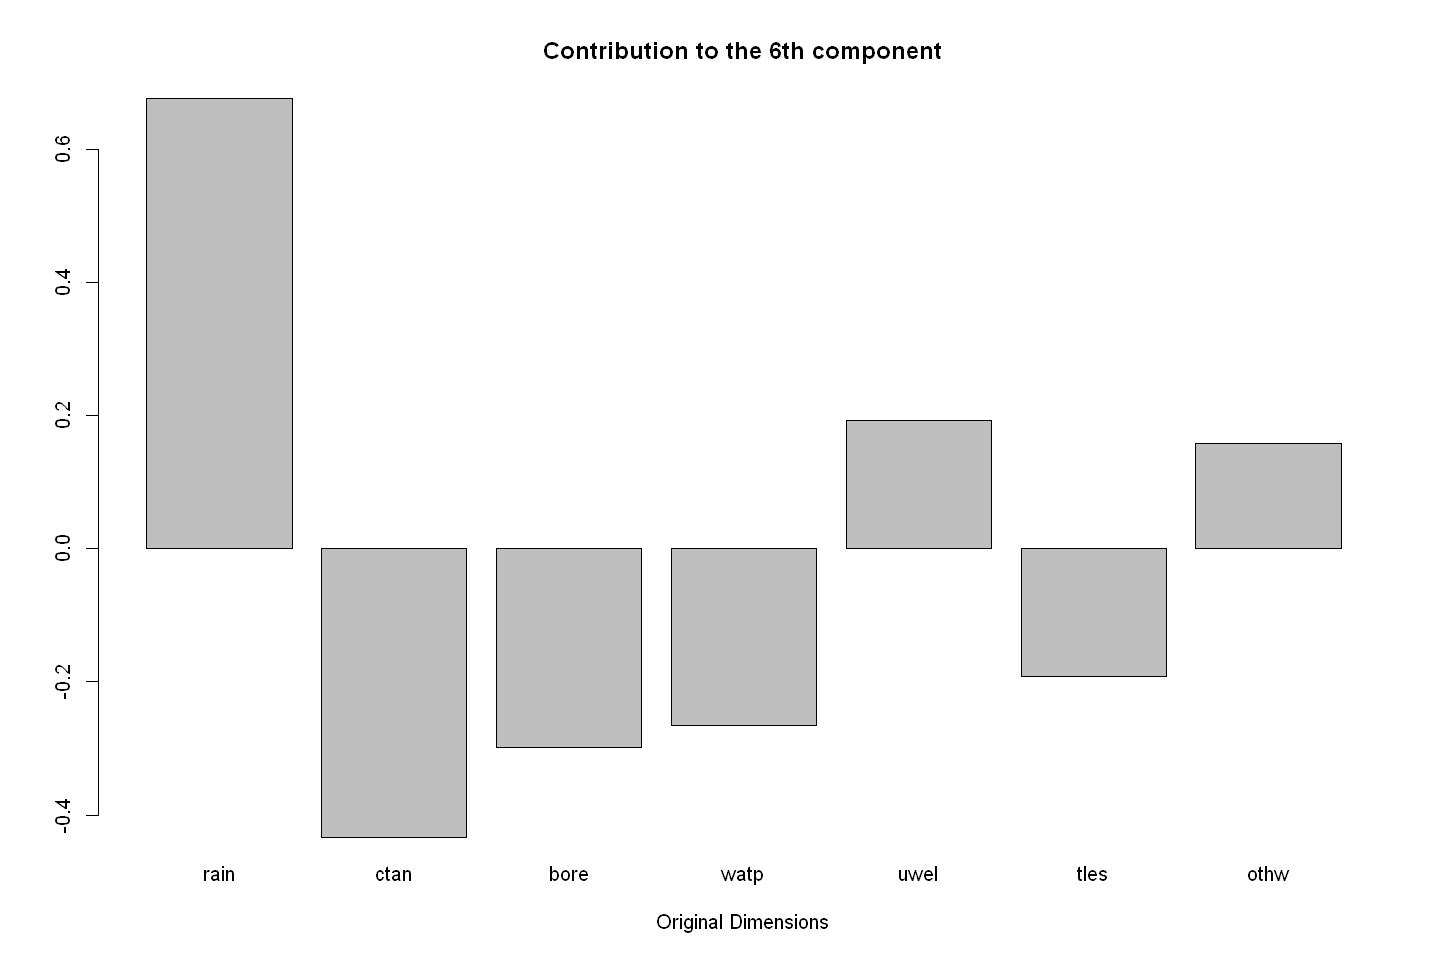

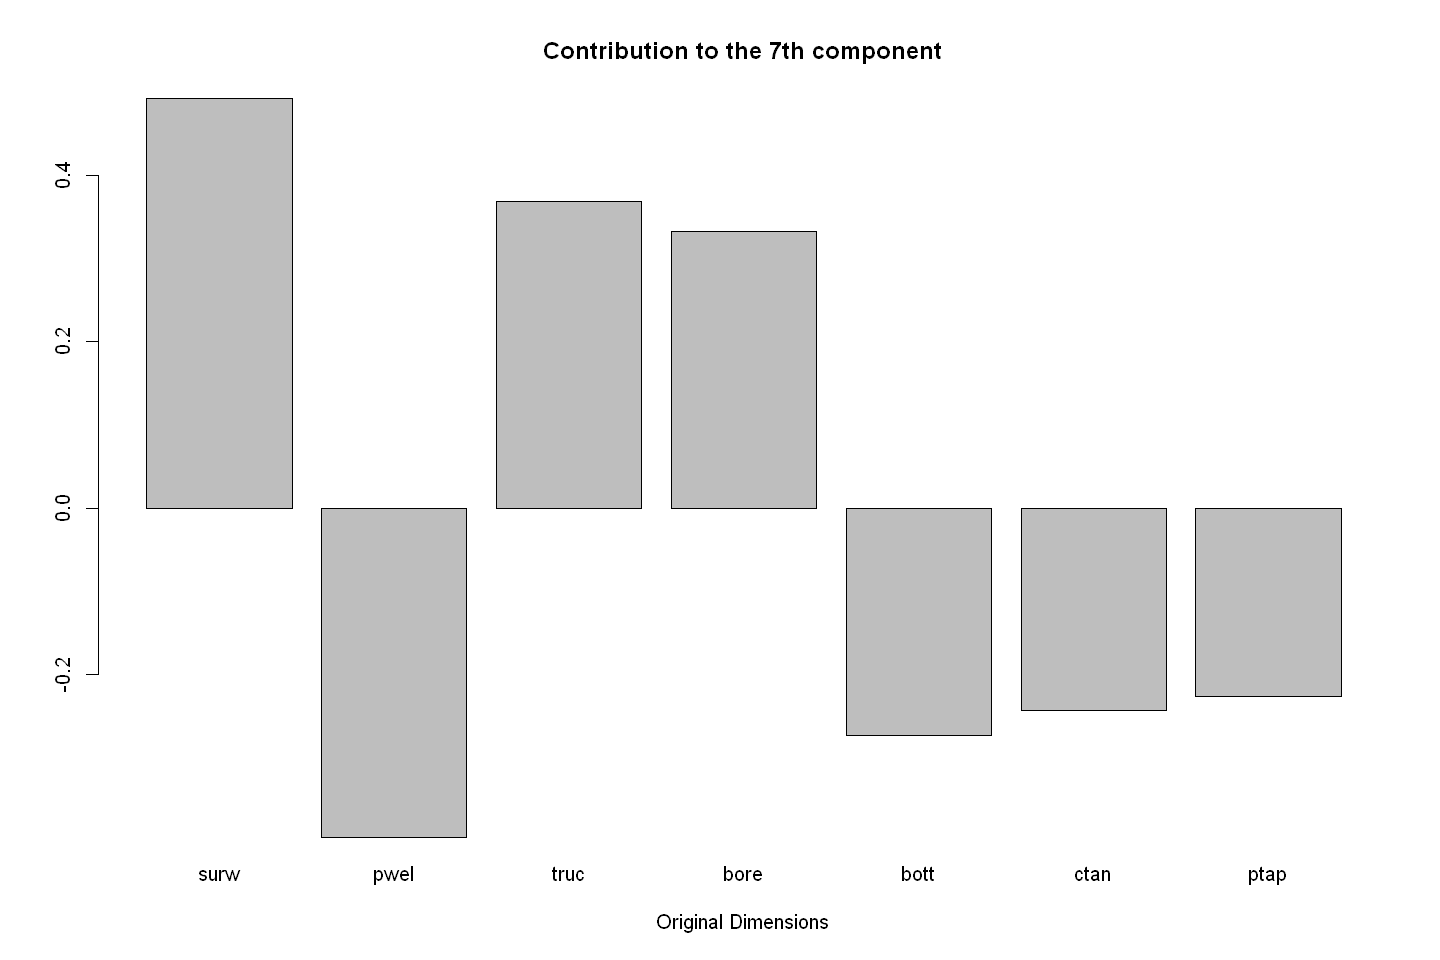

In [54]:
PC_contr1 <- PC_contr[1:7] # We just select the 7 highest contributing dimensions (highest loading)
PC_contr1
barplot(PC_contr1, main="Contribution to the 1st component", xlab="Original Dimensions") 

# Second principal component vector
PC_contr <- eigenvectors[,c("PC2")] # We order by the magnitude of the contribution
ord <- order( -abs(PC_contr) ) # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord]
PC_contr2 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=5)
barplot(PC_contr2, main="Contribution to the 2nd component",xlab="Original Dimensions") 
# Third principal component vector
PC_contr <- eigenvectors[,c("PC3")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr3 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr3, main="Contribution to the 3rd component",xlab="Original Dimensions") 
# 4 principal component vector
PC_contr <- eigenvectors[,c("PC4")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr4 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr4, main="Contribution to the 4th component",xlab="Original Dimensions") 
# 5 principal component vector
PC_contr <- eigenvectors[,c("PC5")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr5 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr5, main="Contribution to the 5th component",xlab="Original Dimensions") 
# 6 principal component vector
PC_contr <- eigenvectors[,c("PC6")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr6 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr6, main="Contribution to the 6th component",xlab="Original Dimensions") 
# 7 principal component vector
PC_contr <- eigenvectors[,c("PC7")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr7 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr7, main="Contribution to the 7th component",xlab="Original Dimensions")

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 73 individuals, described by 17 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.5394801,26.702824,26.70282
Dim.2,1.8590877,10.935810,37.63863
Dim.3,1.6842485,9.907344,47.54598
Dim.4,1.4260389,8.388464,55.93444
Dim.5,1.2020438,7.070846,63.00529
Dim.6,0.9970314,5.864891,68.87018
Dim.7,0.9846722,5.792189,74.66237


Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
phom,-0.68348328,0.14307227,-0.195088476,0.13345140,-0.4538236270
pipy,-0.16136091,0.57967204,-0.388084236,-0.11833104,0.4830680485
ptap,0.56565533,0.52028607,-0.303955618,-0.06308662,0.1508026552
bore,0.29006724,-0.57041371,-0.200957050,-0.43883145,0.0005626645
pwel,0.38004676,-0.45921570,-0.152790649,0.38641272,-0.1171191773
pspr,0.35448425,0.44457479,0.551505663,-0.07871890,-0.2970229013
rain,-0.25596782,-0.12317373,0.415768737,-0.11345750,0.3990607011
uwel,0.59388615,-0.37808385,-0.320830640,0.20127094,0.1006773477
uspr,0.54262561,0.27045904,0.578361577,0.02203935,-0.0944507655
truc,-0.17974484,0.08970247,-0.075145283,0.63464373,-0.2732186276


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
phom,0.467149399,0.020469673,3.805951e-02,0.0178092753,2.059559e-01
pipy,0.026037344,0.336019671,1.506094e-01,0.0140022344,2.333547e-01
ptap,0.319965957,0.270697593,9.238902e-02,0.0039799216,2.274144e-02
bore,0.084139004,0.325371797,4.038374e-02,0.1925730412,3.165913e-07
pwel,0.144435536,0.210879061,2.334498e-02,0.1493147887,1.371690e-02
pspr,0.125659085,0.197646745,3.041585e-01,0.0061966650,8.822260e-02
rain,0.065519526,0.015171769,1.728636e-01,0.0128726046,1.592494e-01
uwel,0.352700762,0.142947399,1.029323e-01,0.0405099920,1.013593e-02
uspr,0.294442556,0.073148094,3.345021e-01,0.0004857328,8.920947e-03
truc,0.032308208,0.008046534,5.646814e-03,0.4027726618,7.464842e-02


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
phom,10.29081289,1.10106014,2.259733e+00,1.24886326,1.713381e+01
pipy,0.57357546,18.07443909,8.942230e+00,0.98189712,1.941316e+01
ptap,7.04851553,14.56077600,5.485474e+00,0.27908928,1.891898e+00
bore,1.85349430,17.50169184,2.397730e+00,13.50405289,2.633775e-05
pwel,3.18176387,11.34314768,1.386077e+00,10.47059750,1.141132e+00
pspr,2.76813828,10.63138371,1.805900e+01,0.43453689,7.339383e+00
rain,1.44332667,0.81608678,1.026355e+01,0.90268260,1.324822e+01
uwel,7.76962906,7.68911550,6.111467e+00,2.84073550,8.432245e-01
uspr,6.48626169,3.93462315,1.986061e+01,0.03406168,7.421482e-01
truc,0.71171604,0.43282164,3.352720e-01,28.24415760,6.210125e+00


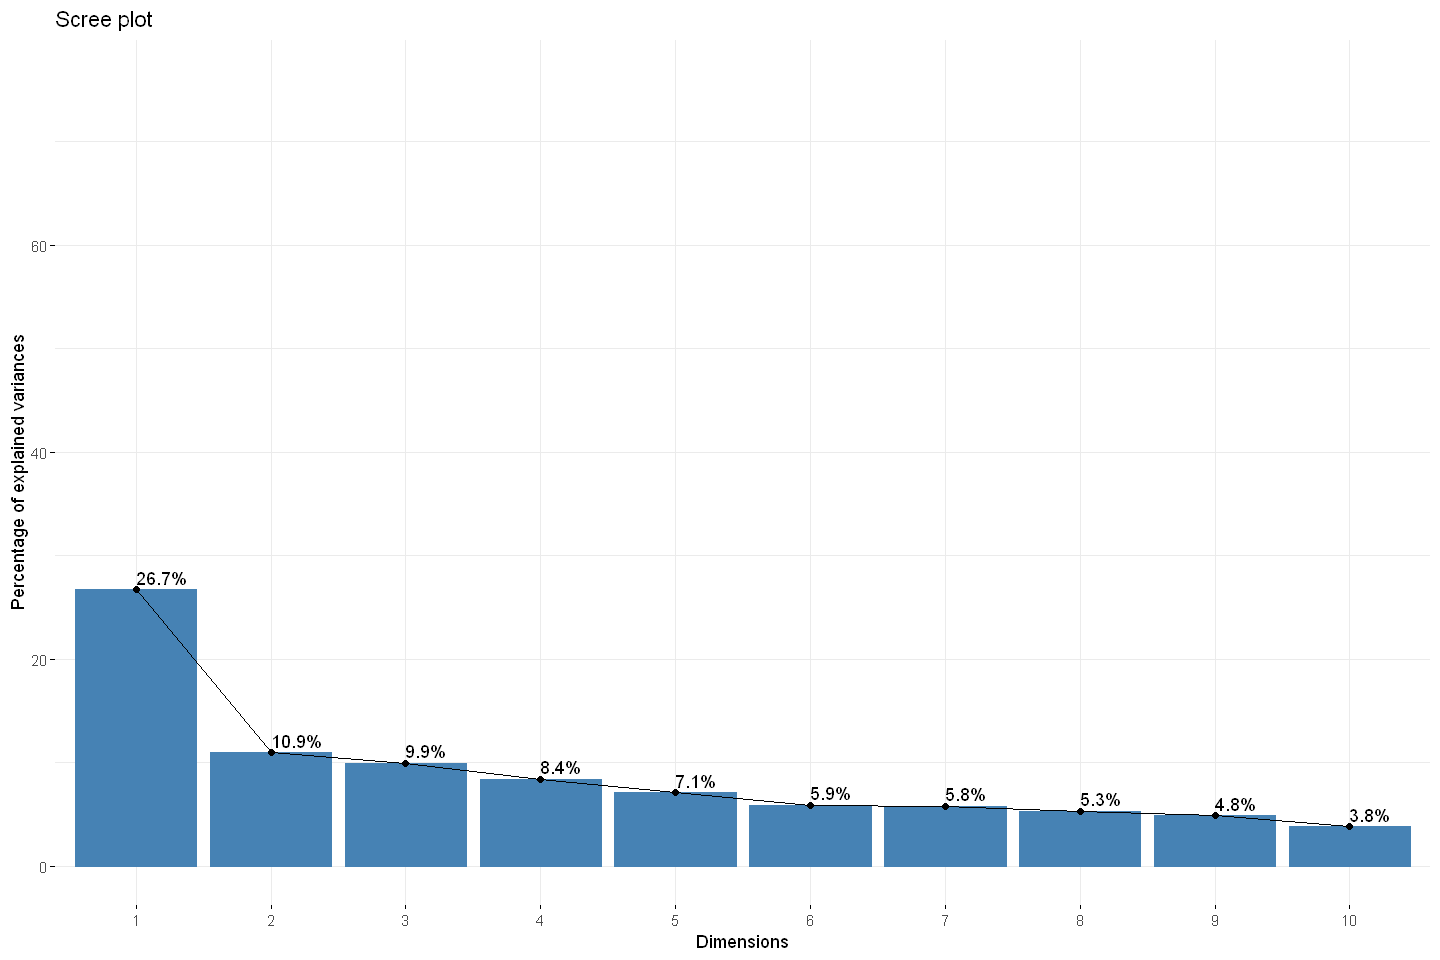

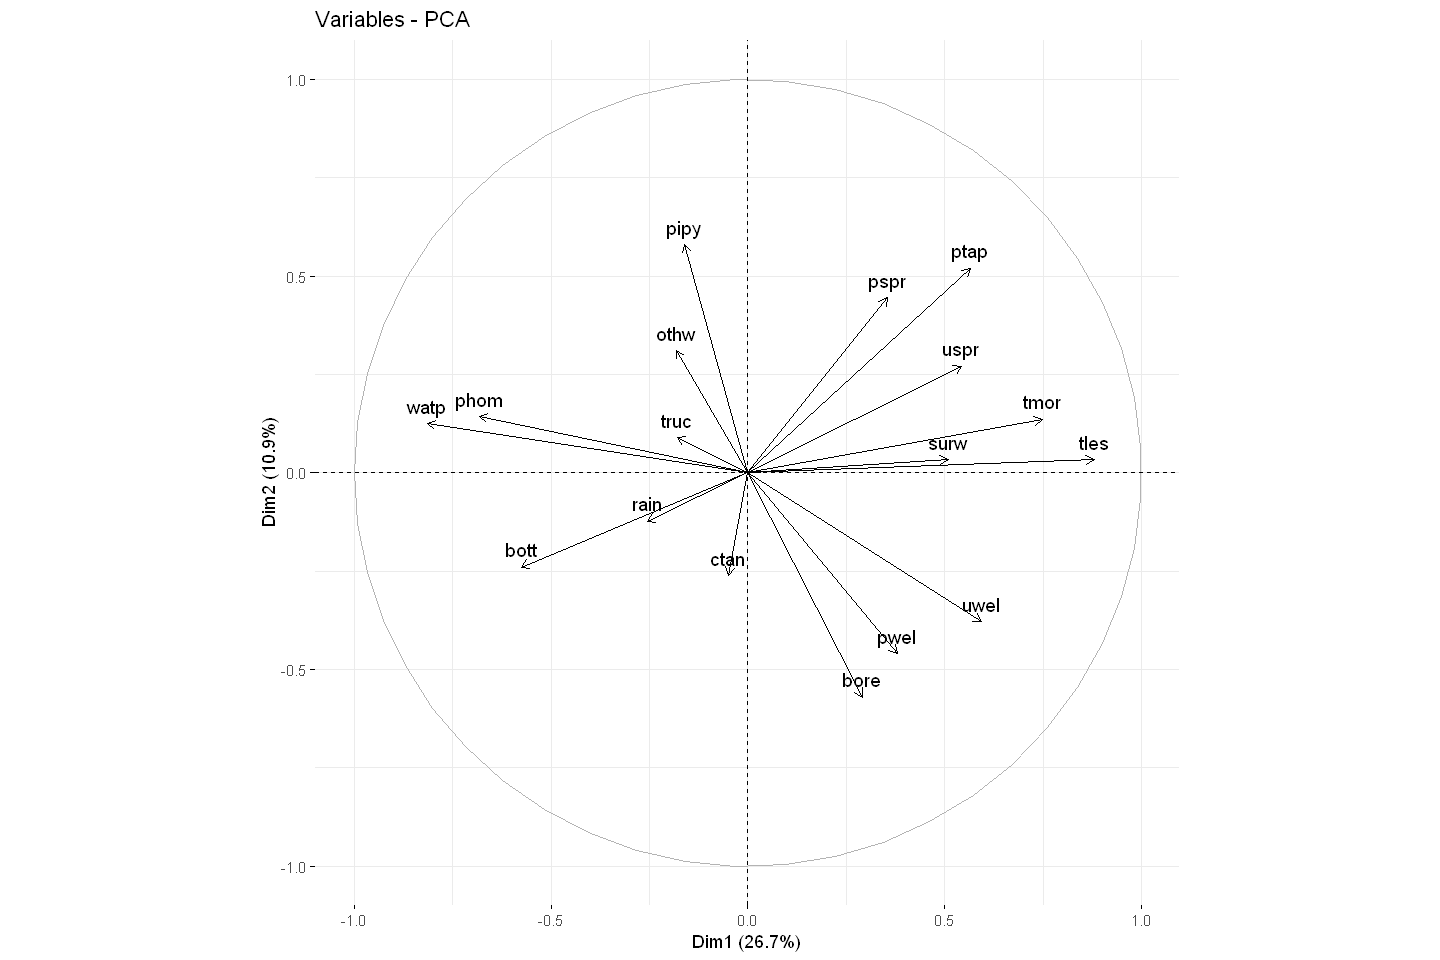

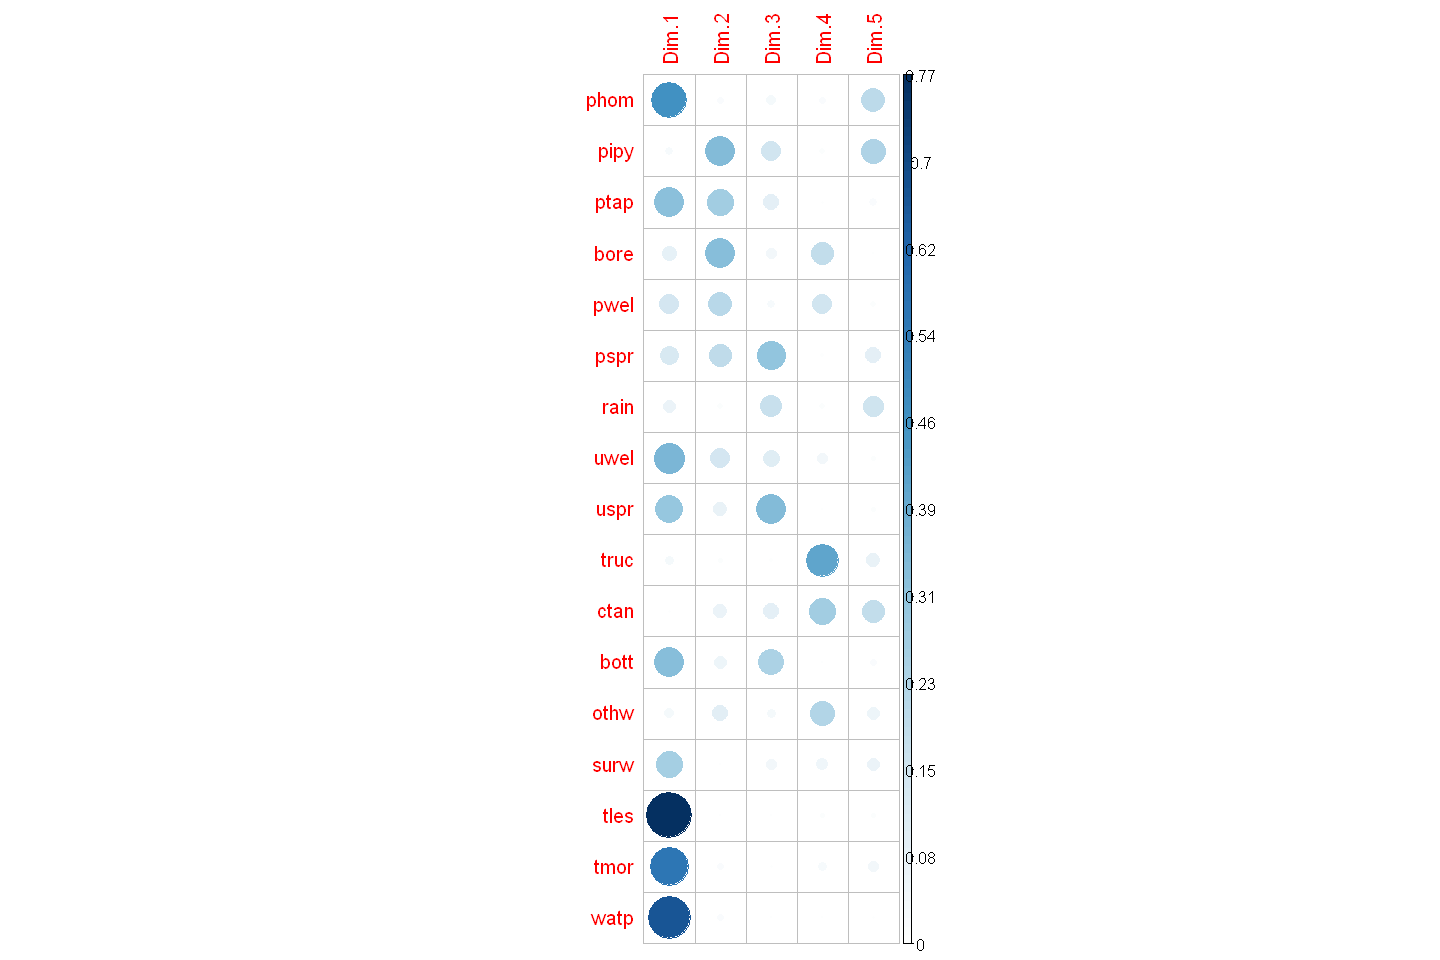

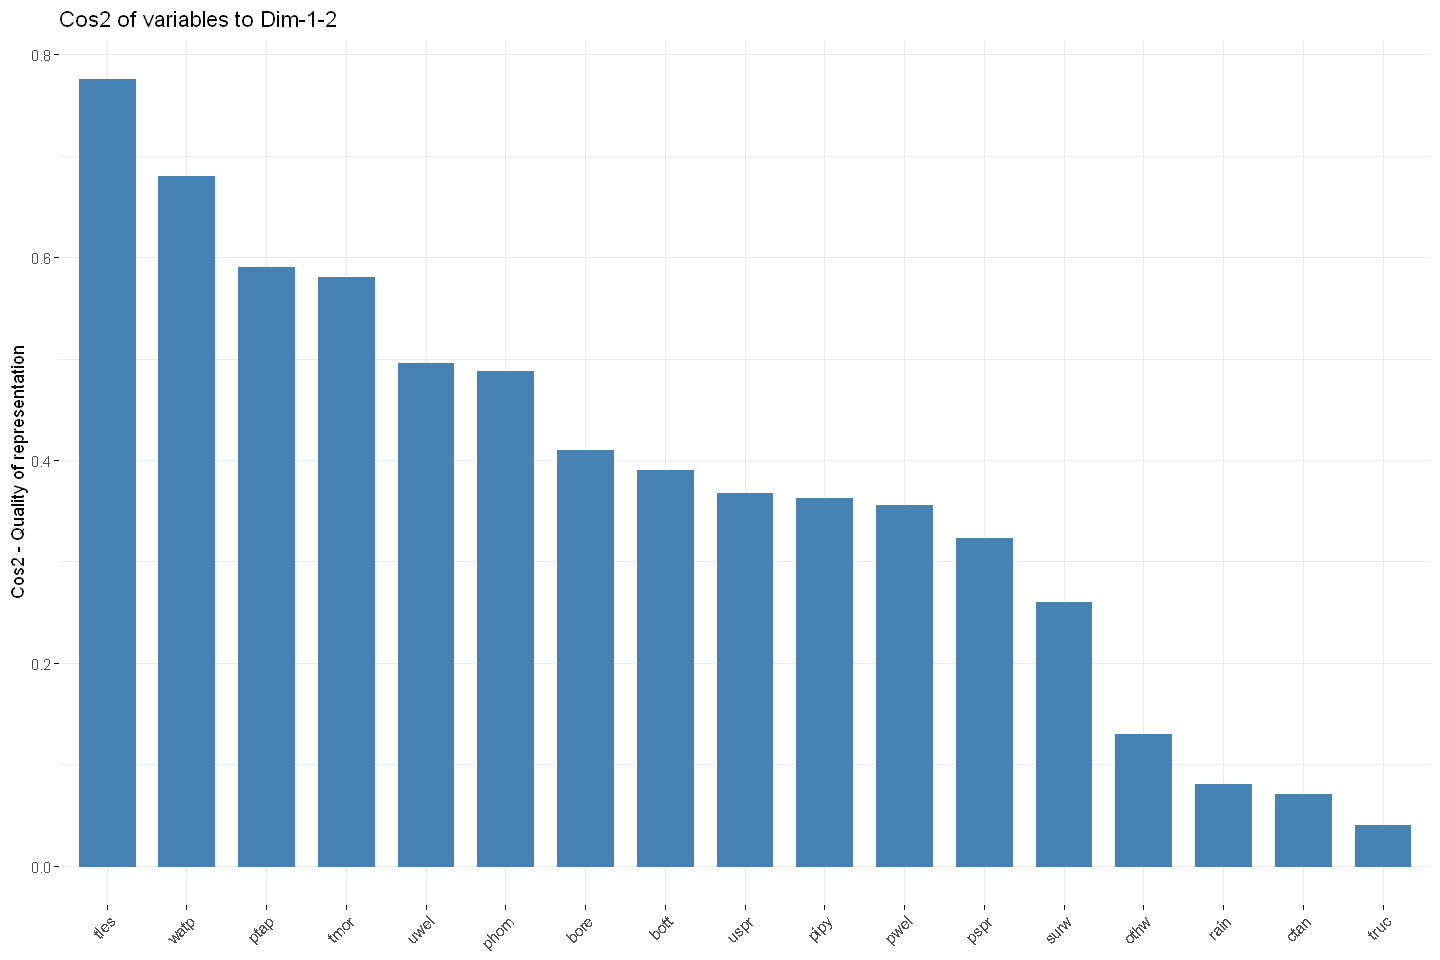

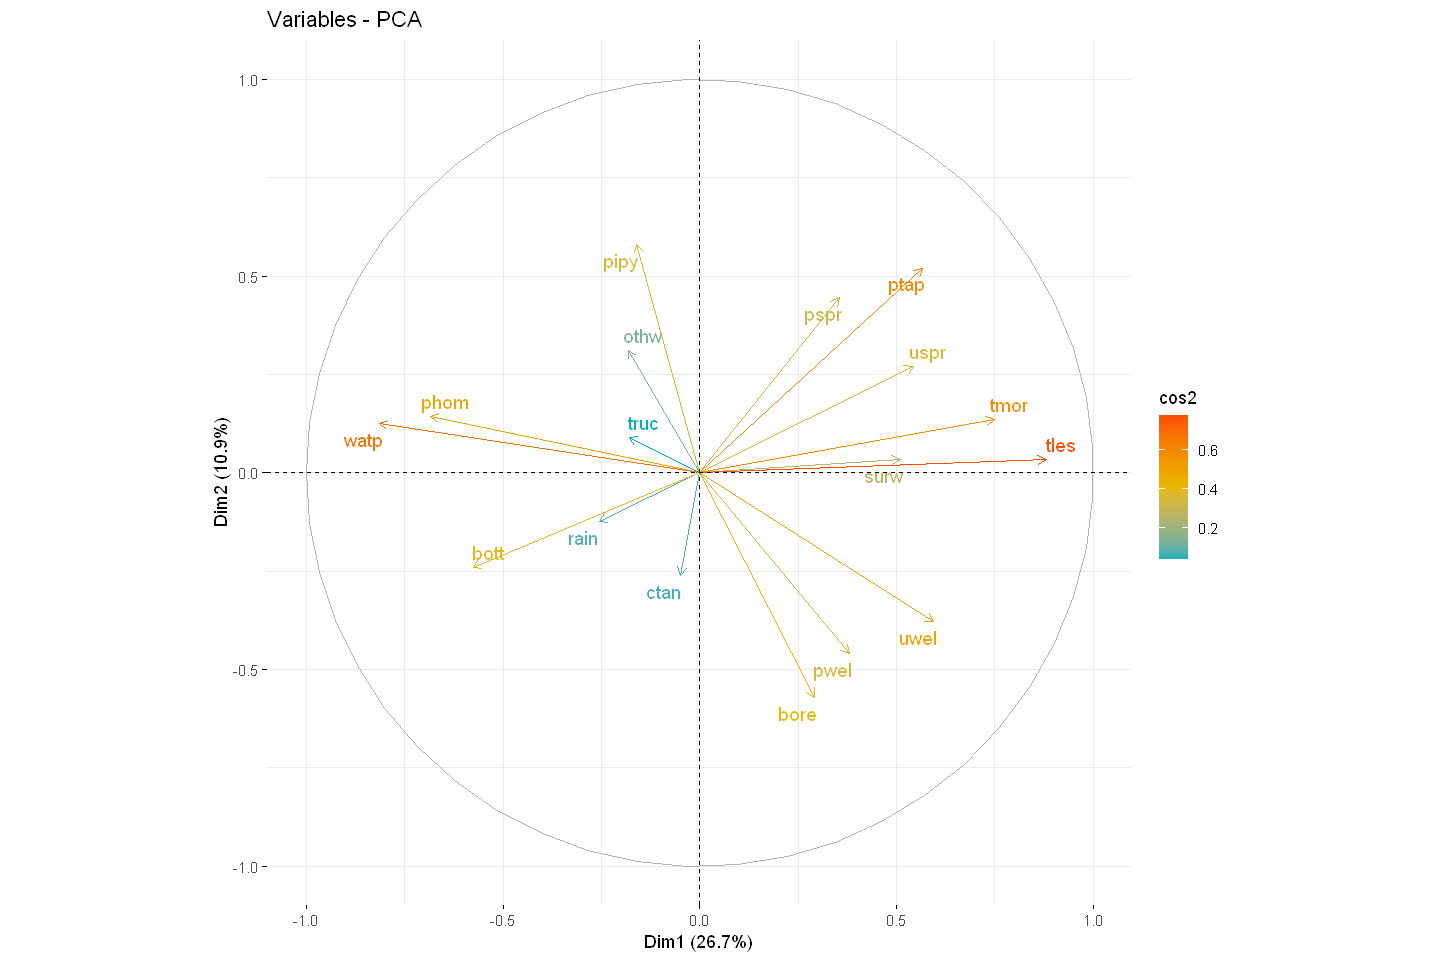

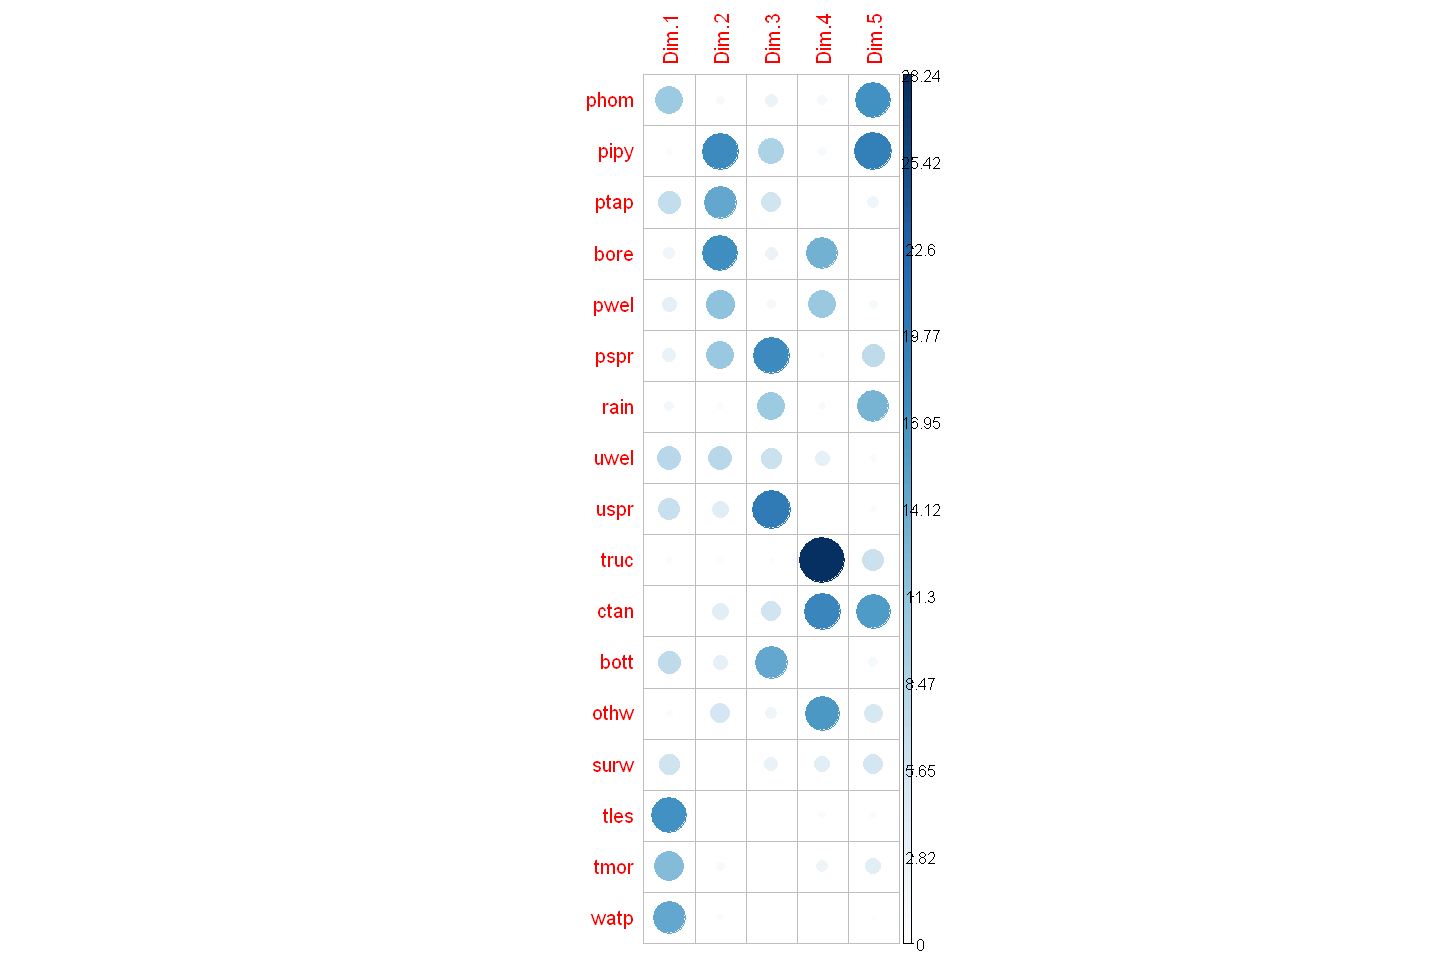

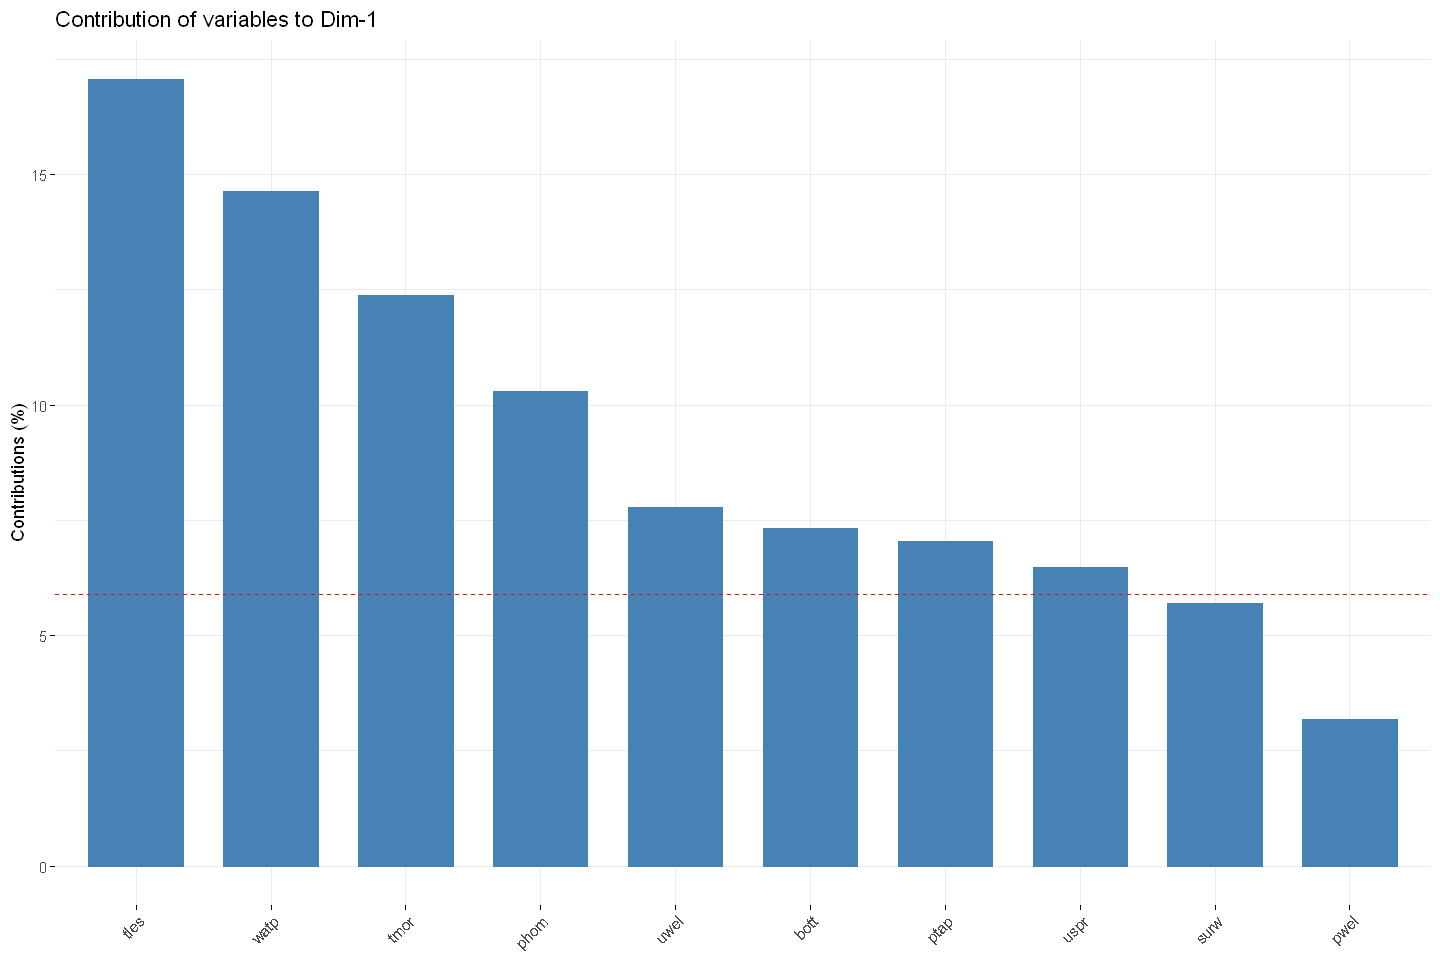

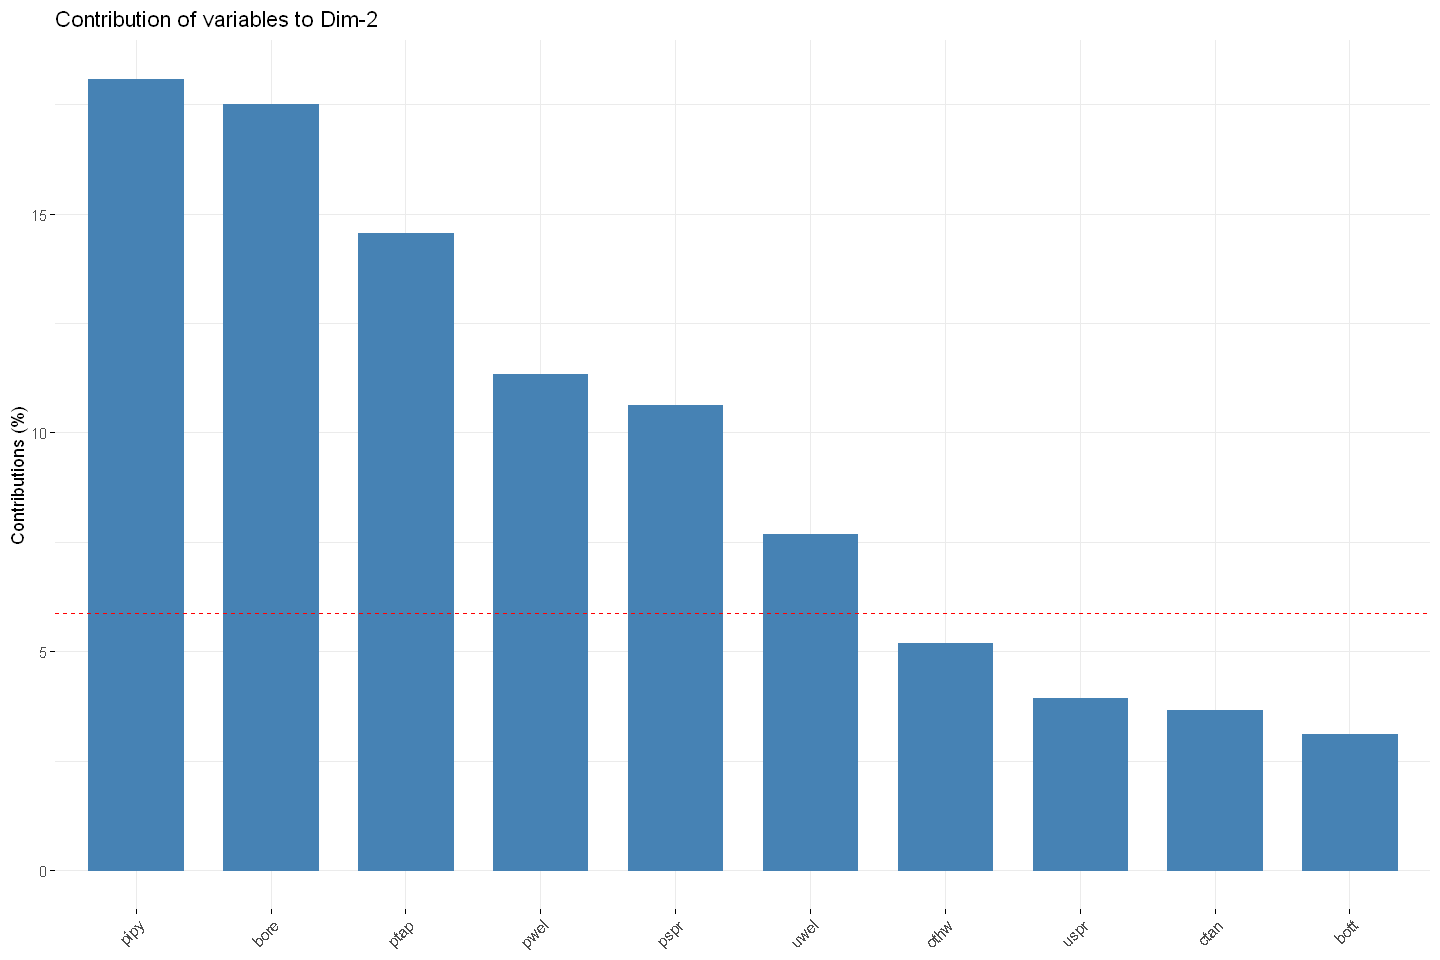

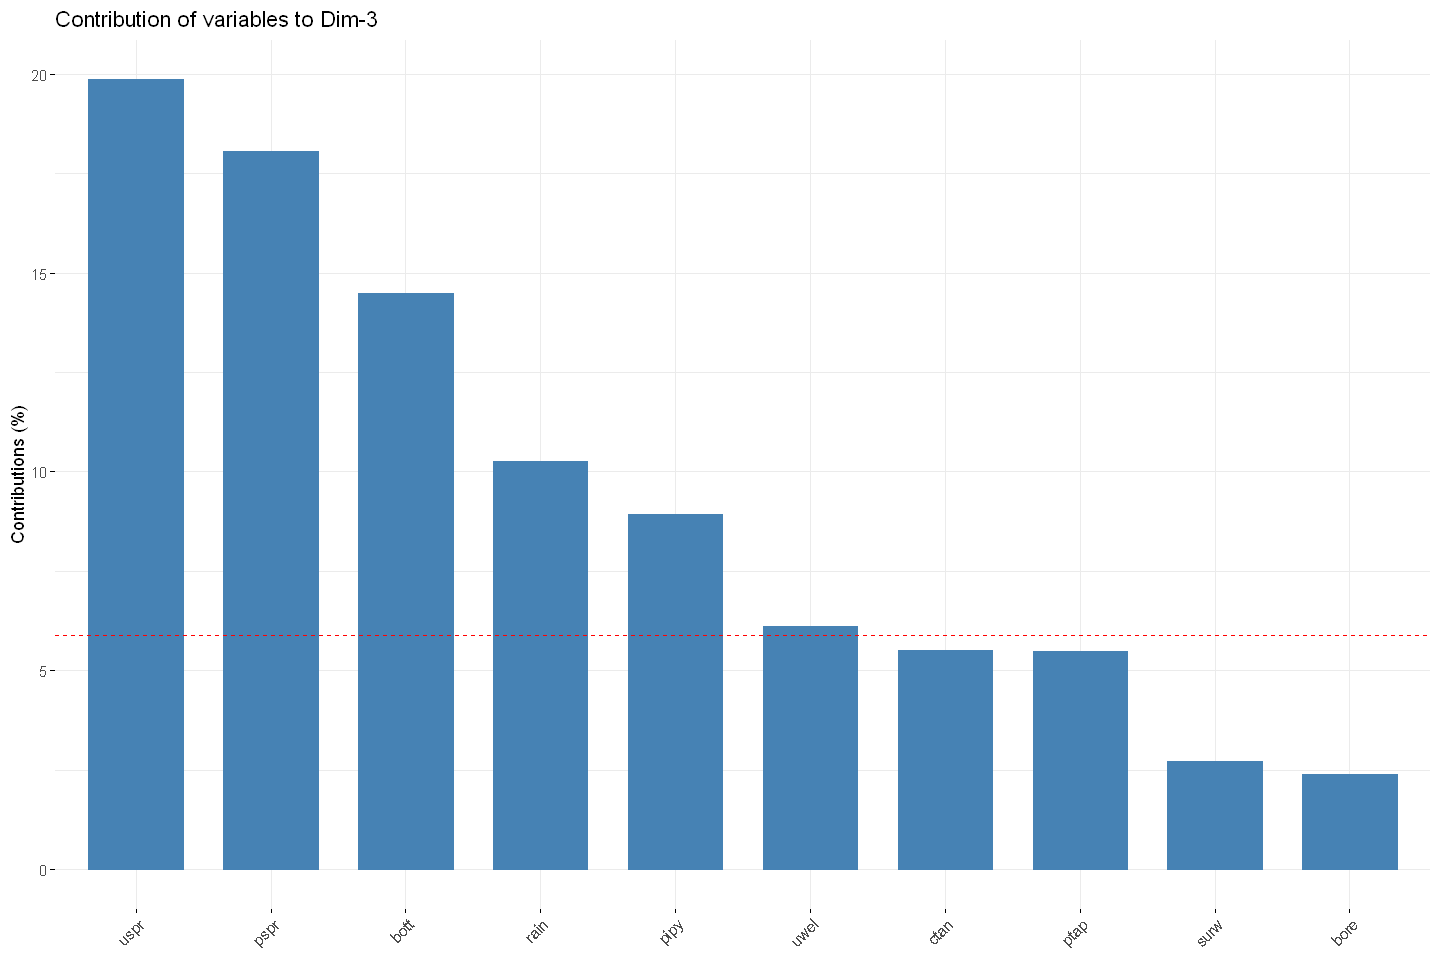

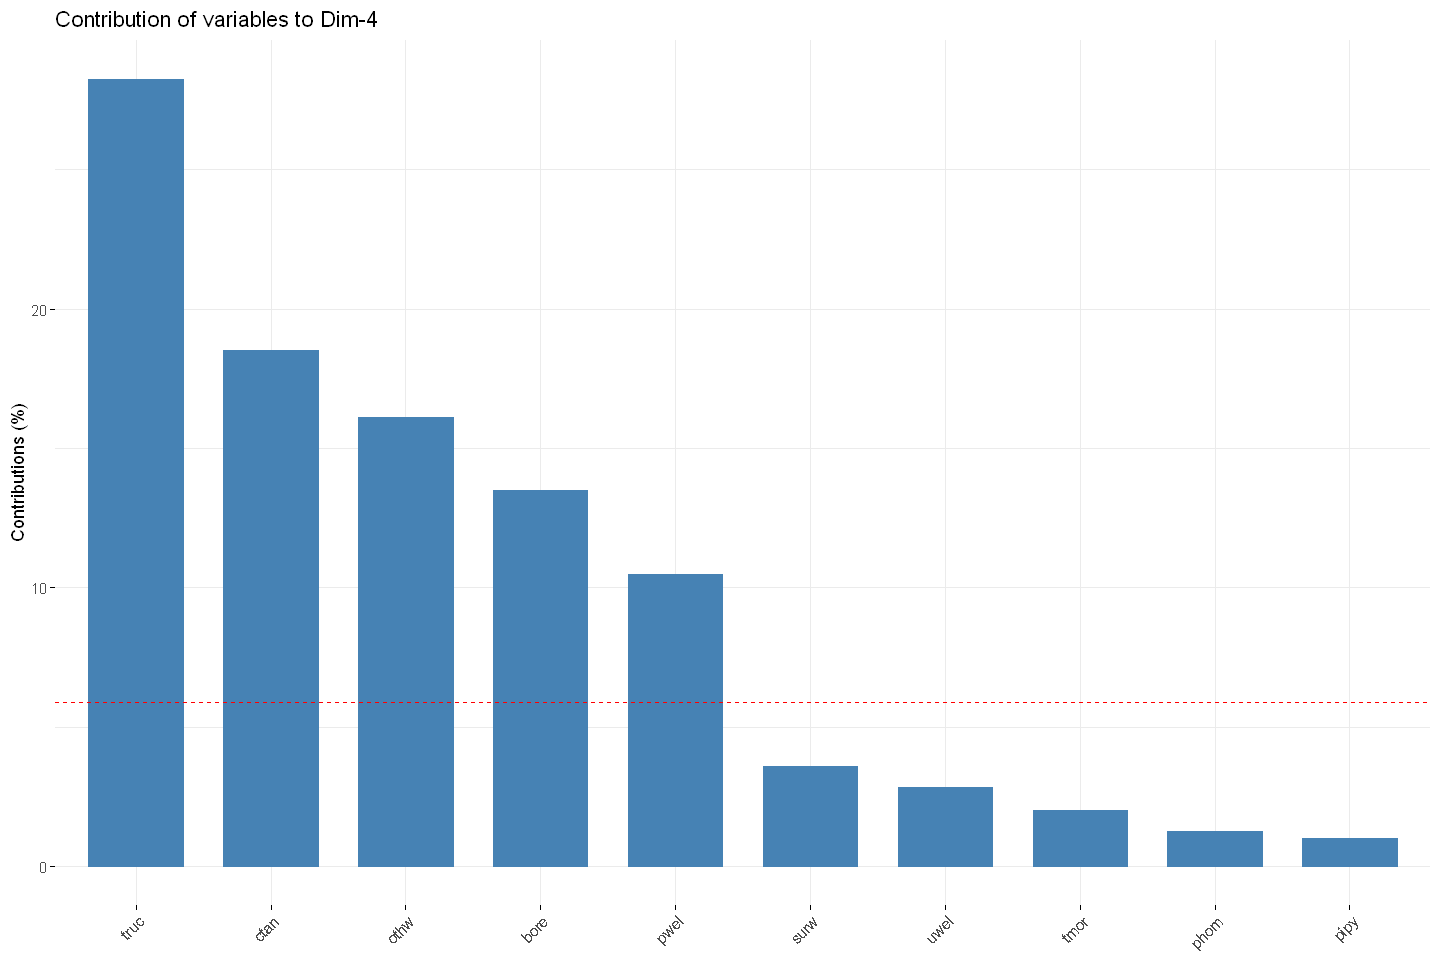

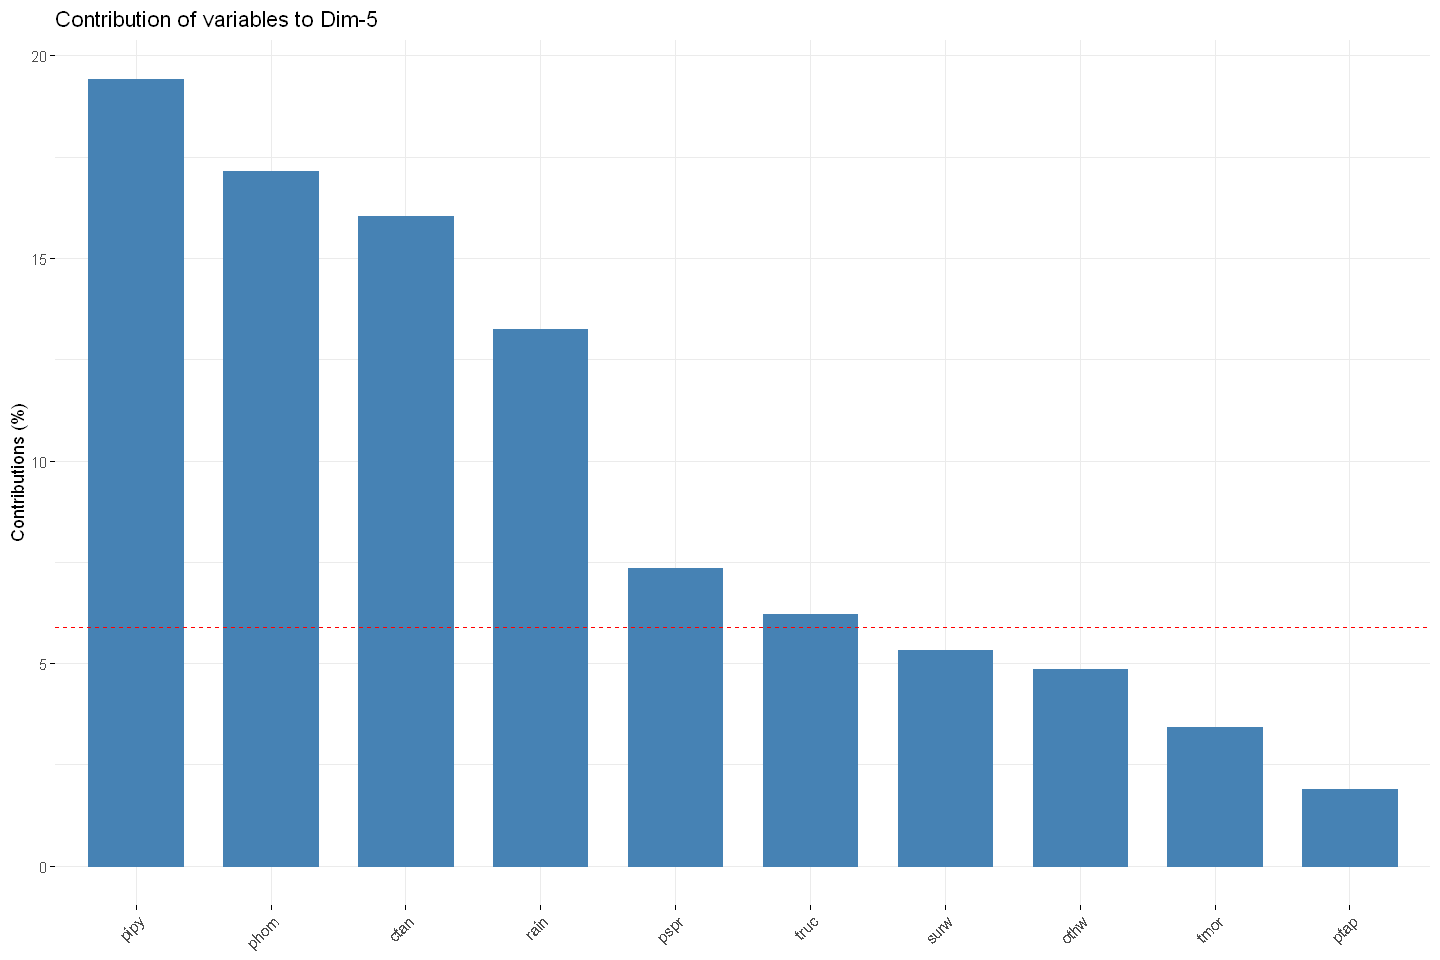

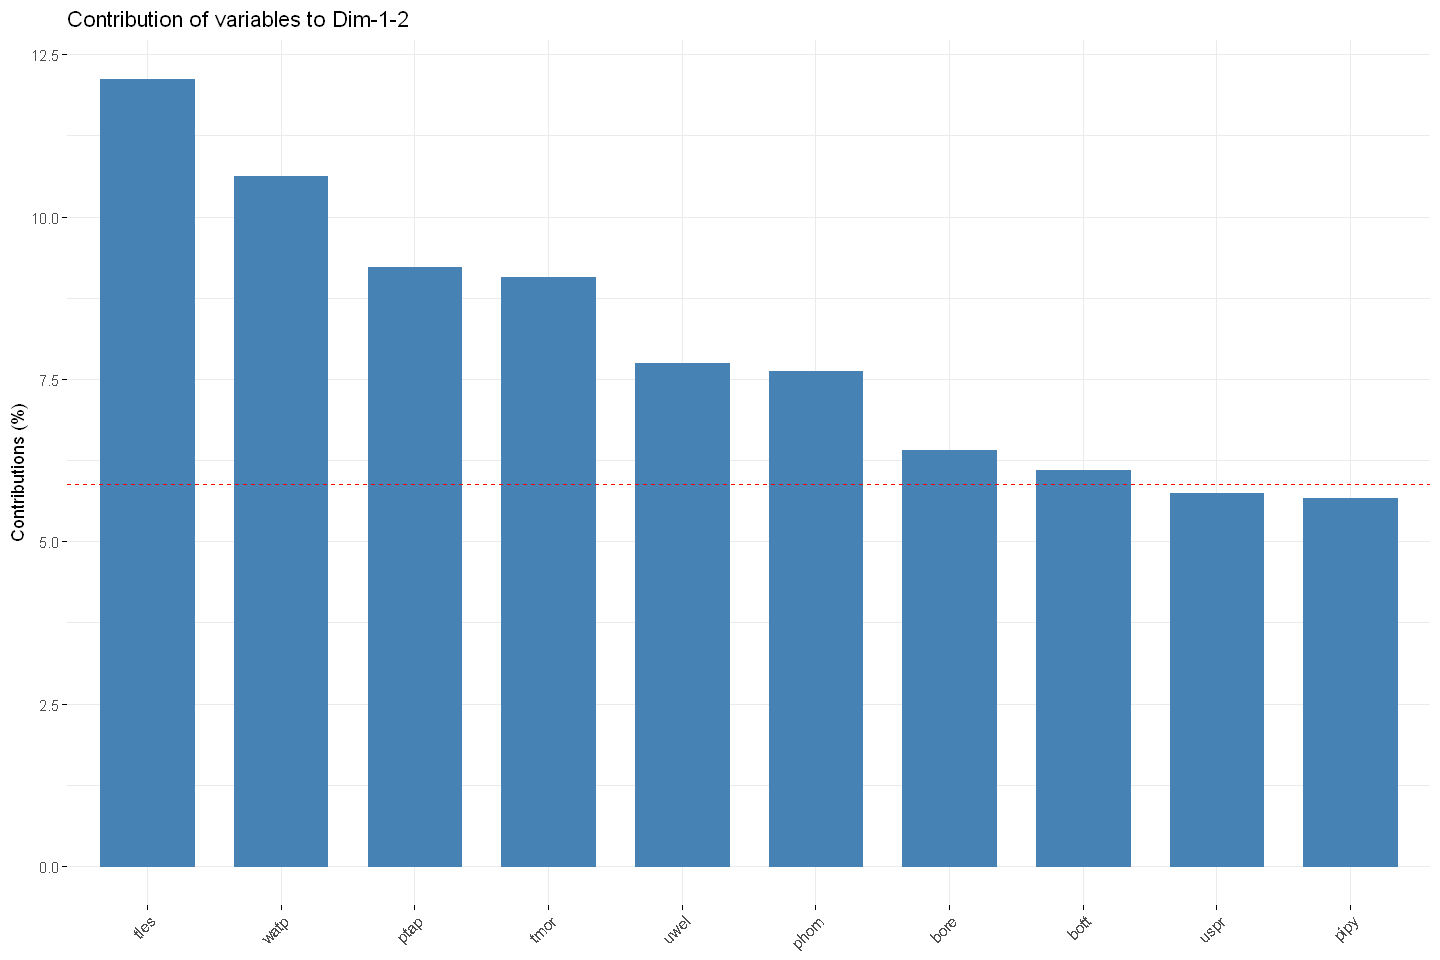

,correlation,p.value
tles,0.8799333,1.202745e-24
tmor,0.7493452,2.425753e-14
uwel,0.5938862,3.054839e-08
ptap,0.5656553,1.841675e-07
uspr,0.5426256,7.078059e-07
surw,0.5089718,4.264890e-06
pwel,0.3800468,9.116817e-04
pspr,0.3544843,2.090786e-03
bore,0.2900672,1.279836e-02
rain,-0.2559678,2.883040e-02


,correlation,p.value
pipy,0.5796720,7.709762e-08
ptap,0.5202861,2.382126e-06
pspr,0.4445748,8.133718e-05
othw,0.3108197,7.440641e-03
uspr,0.2704590,2.065512e-02
bott,-0.2402530,4.062022e-02
ctan,-0.2609637,2.574838e-02
uwel,-0.3780839,9.740204e-04
pwel,-0.4592157,4.378858e-05
bore,-0.5704137,1.376572e-07


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
1,1.2868468,-1.03663795,0.61217110,2.5031244,1.5252169
2,-2.8131857,0.12703295,0.02071369,1.9560088,-2.3053703
3,1.1537387,0.06555506,0.89534684,4.4143348,1.5590803
4,-3.5437710,0.48733676,-0.62306608,-0.2883615,-2.0917900
5,-1.6112298,1.00924477,-0.29320267,1.8187272,-0.7509672
6,-0.7290469,-2.21050962,-0.71995716,-2.6851476,-0.3165718


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
1,0.09008327,0.0584580892,2.038619e-02,0.34084369,0.126547524
2,0.29596286,0.0006034944,1.604558e-05,0.14308103,0.198756712
3,0.04438033,0.0001432808,2.672749e-02,0.64968992,0.081042453
4,0.58244479,0.0110149314,1.800494e-02,0.00385654,0.202936234
5,0.20297363,0.0796375065,6.721411e-03,0.25861861,0.044092694
6,0.02177059,0.2001447209,2.123111e-02,0.29532189,0.004104911


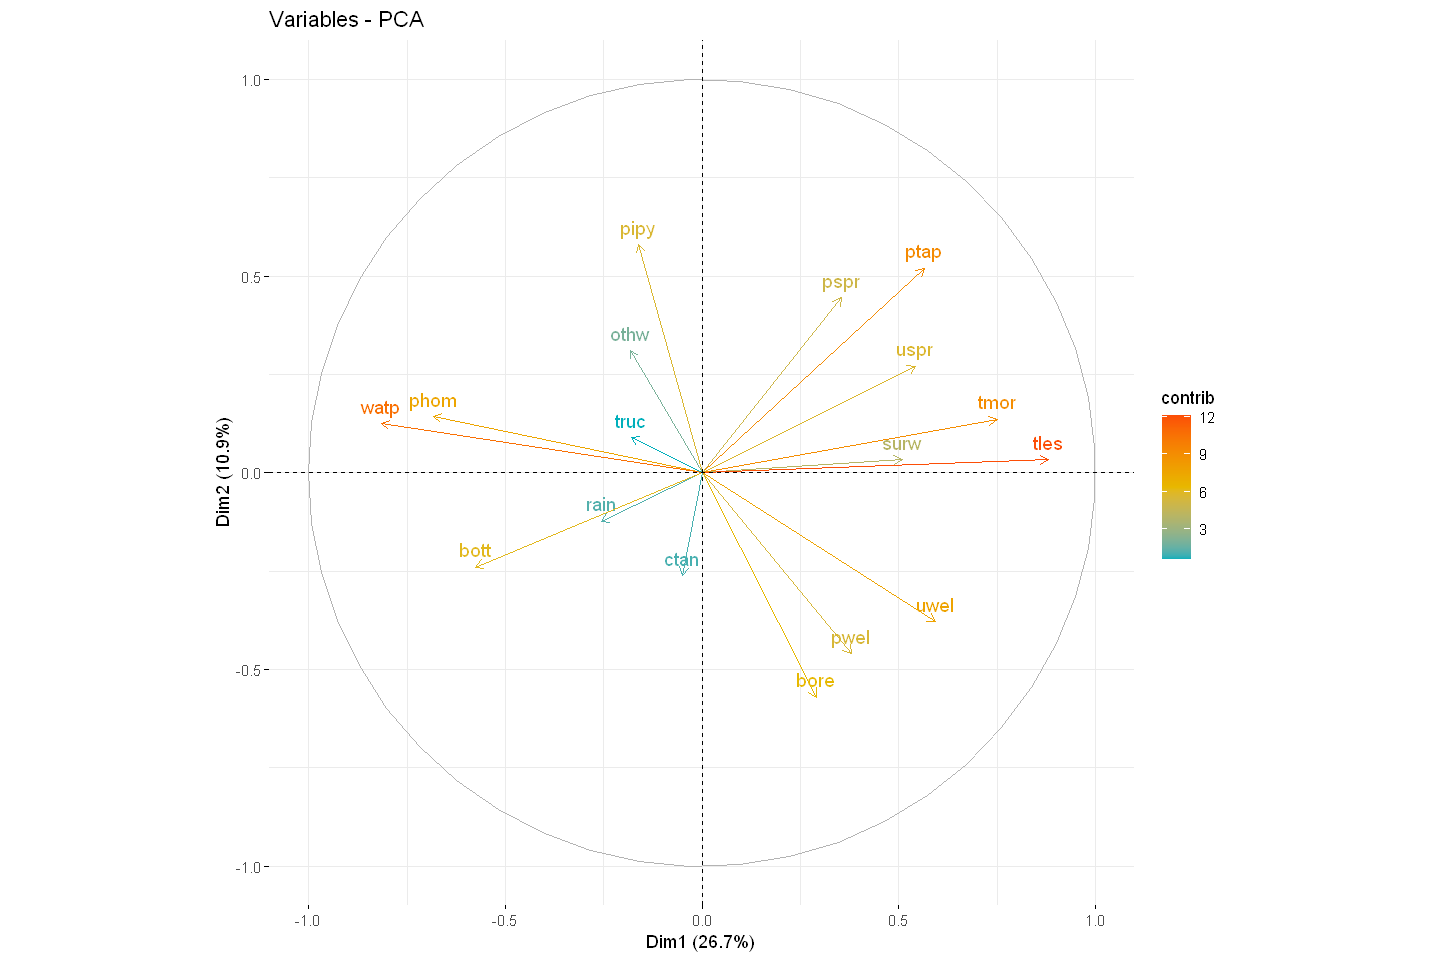

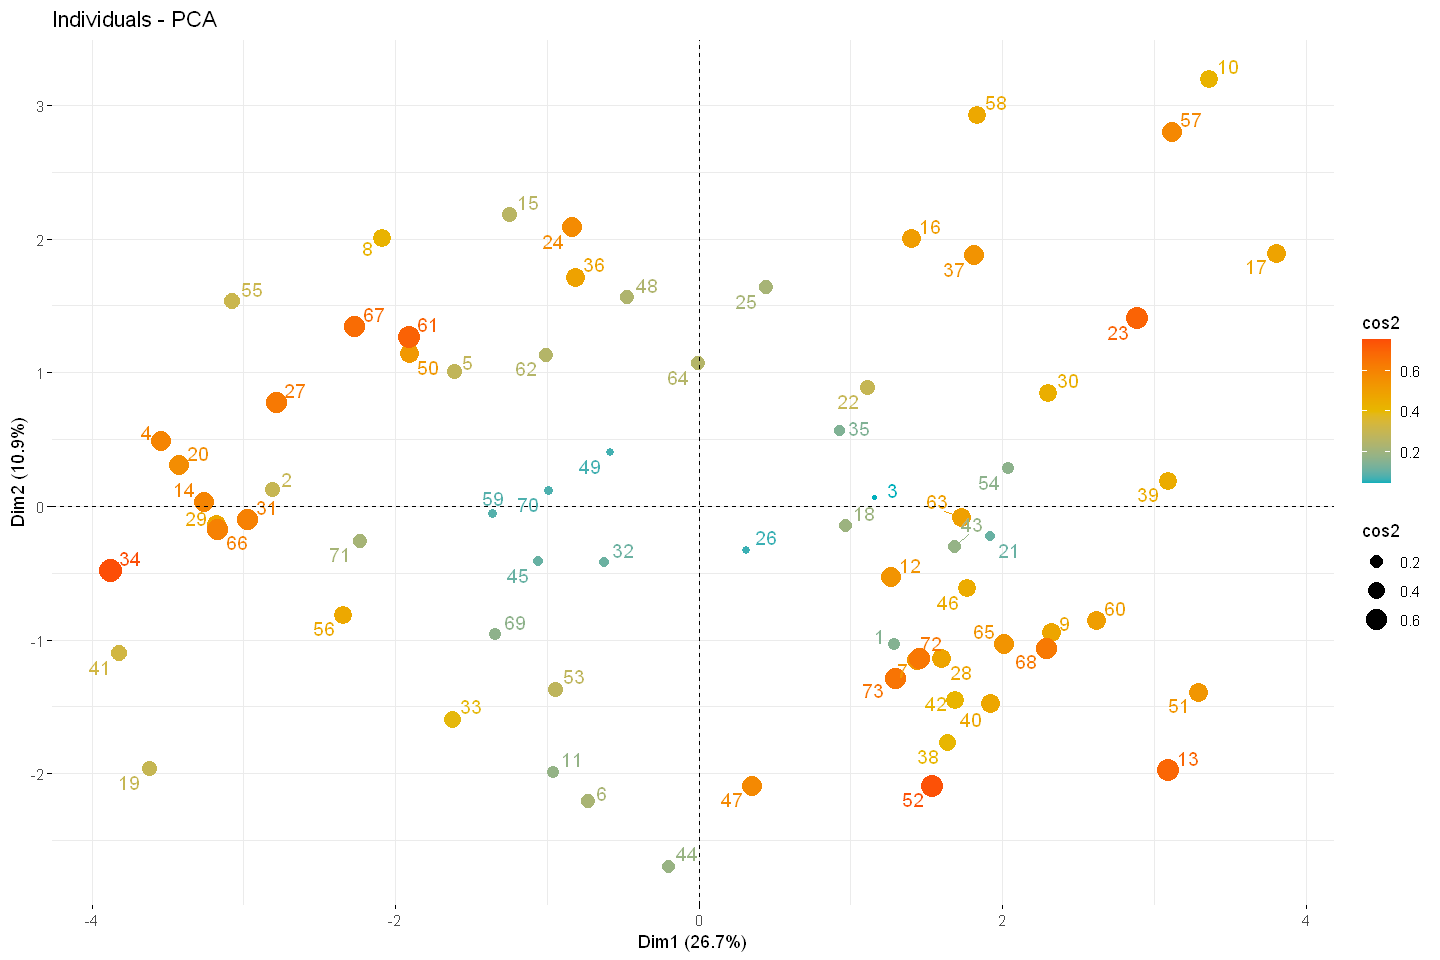

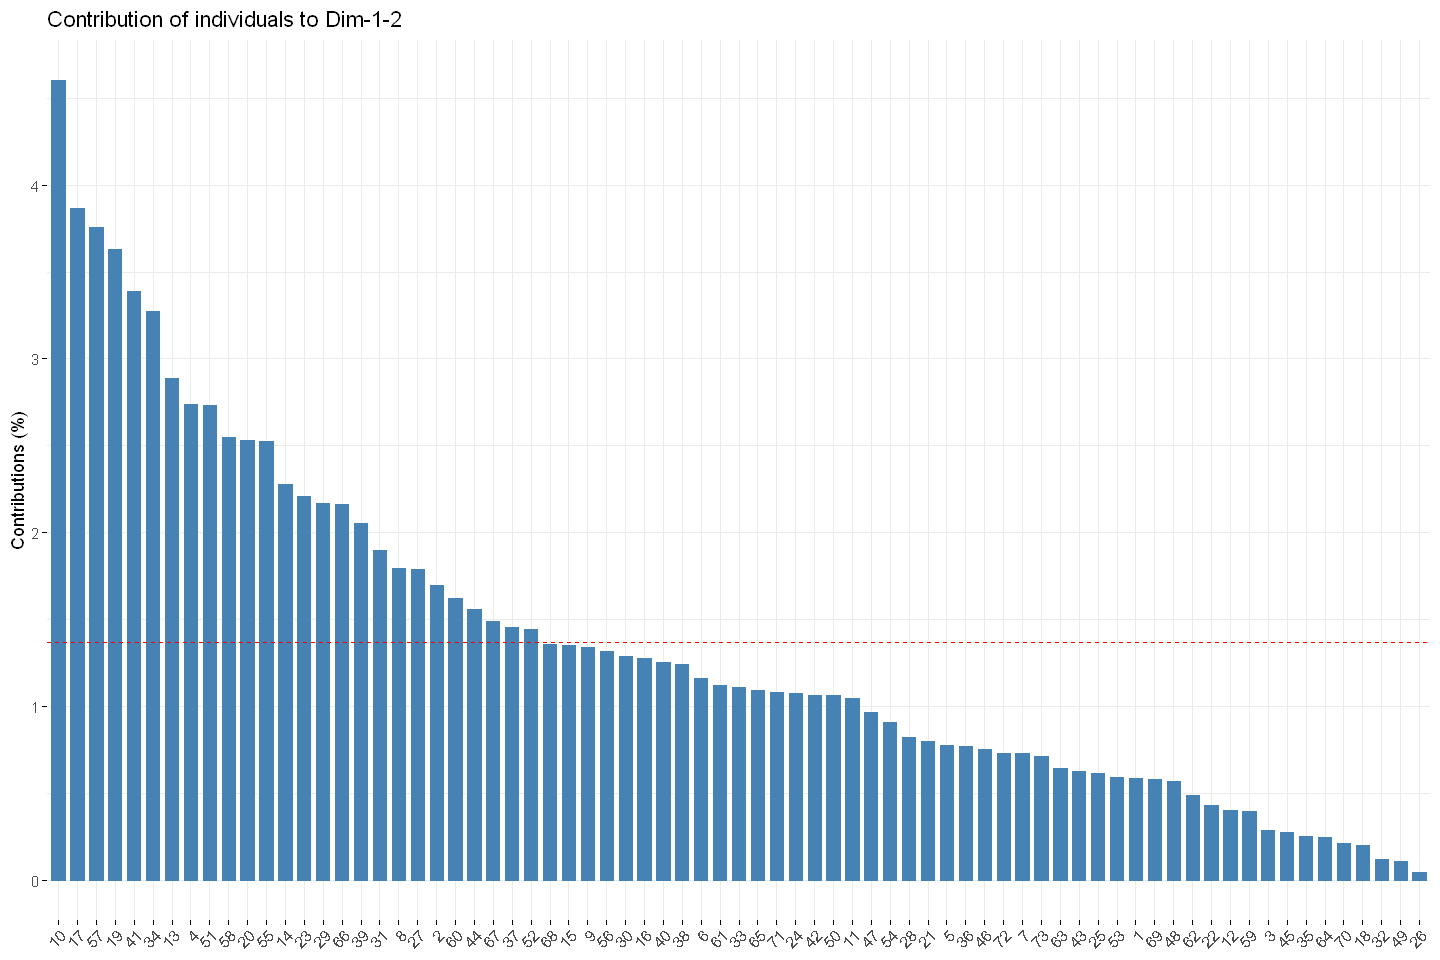

In [55]:
res.pca <- PCA(df.wa.nocountry, graph = FALSE)
print(res.pca)
eig.val <- get_eigenvalue(res.pca) #The object that is created using the function PCA() contains many information found in many different lists and matrices. These values are described in the next section.
head(eig.val,7)
#An eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in
#standardized data. This is commonly used as a cutoff point for which PCs are retained. This holds true only when
#the data are standardized.
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 76))
var <- get_pca_var(res.pca)
var
# Coordinates
head(var$coord, 17)
# Cos2: quality on the factor map
head(var$cos2,17)
# Contributions to the principal components
head(var$contrib, 17)
#For all the 17 variables.
fviz_pca_var(res.pca, col.var = "black")
#The plot above is also known as variable correlation plots. It shows the relationships between all variables. It can be interpreted as follow:
#Positively correlated variables are grouped together.
#Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
#The distance between variables and the origin measures the quality of the variables on the factor map. Variables that
#are away from the origin are well represented on the factor map.
corrplot(var$cos2, is.corr=FALSE, tl.cex = 1 )
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2, tl.cex = 1)
#A high cos2 indicates a good representation of the variable on the principal component. In this case the variable is
#positioned close to the circumference of the correlation circle.
#A low cos2 indicates that the variable is not perfectly represented by the PCs.
#In this case the variable is close to the center of the circle.
#The cos2 values are used to estimate the quality of the representation
#The closer a variable is to the circle of correlations,
#the better its representation on the factor map (and the more important it is to interpret these components)
#Variables that are closed to the center of the plot are less important for the first components.
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping, 
    )
#variables with low cos2 values will be colored in "white"
#variables with mid cos2 values will be colored in "blue"
#variables with high cos2 values will be colored in red
corrplot(var$contrib, is.corr=FALSE,tl.cex = 1) 
#The larger the value of the contribution, the more the variable contributes to the component.
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)
# Contributions of variables to PC3
fviz_contrib(res.pca, choice = "var", axes = 3, top = 10)
# Contributions of variables to PC4
fviz_contrib(res.pca, choice = "var", axes = 4, top = 10)
# Contributions of variables to PC5
fviz_contrib(res.pca, choice = "var", axes = 5, top = 10)
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)
#It can be seen that the variables H IWS P and H W - contribute the most to the dimensions 1 and 2.
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
)
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1
res.desc$Dim.2
ind <- get_pca_ind(res.pca)
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
)
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2, tl.cex = .5)